# MRIO data anaylsis using Pymrio
## (Trade 'Z' matrix - excluding domestic trade)
### Jeffrey Zhou
### 10/10/2022

- if running locally, be sure to download zip files prior to running code

In [2]:
import pymrio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
#Replace path with relevant year, or omit year for all downloads

exio3 = pymrio.parse_exiobase3(path='/Users/jeffreyzhou/Desktop/MRIO/Data/IOT_2022_pxp.zip')
all_regions = exio3.get_regions()
all_sectors = exio3.get_sectors()

![alt text](mr_iot_v5_900px.png)

![alt text](IOS_struct.png)

In [49]:
#include all missing calculations with calc_all()
exio3.calc_all()

In [123]:
#US Z matrix - transaction matrix
us_z = exio3.Z.aggregate('US')

#US Y matrix - final demand matrix
us_y = exio3.Y.aggregate('US')


In [107]:
#Sorting all input matrices into source regions (i'm sure theres a better way to do this but this will do for now)

trade_matrix_dict = {}
count = 0
lower_bound = 0
upper_bound = 200

for region in all_regions:
    trade_matrix_dict[region] = us_z.iloc[lower_bound:upper_bound]
    lower_bound += 200
    upper_bound += 200

demand_matrix_dict = {}
count = 0
lower_bound = 0
upper_bound = 200

for region in all_regions:
    demand_matrix_dict[region] = us_y.iloc[lower_bound:upper_bound]
    lower_bound += 200
    upper_bound += 200



In [126]:
trade_calcvalues_dict = {}
    
for region in all_regions:
    tm = trade_matrix_dict[region]
    d = {}
    for sector in all_sectors:
        d[sector] = tm[sector].values.sum()
    in_series = pd.Series(data = d, index = all_sectors)
    trade_calcvalues_dict[region] = in_series



In [185]:
US_total_trade = {}

for sector in all_sectors:
    in_dict = {}
    for region in all_regions:
        if region == 'US':
            continue
        in_dict[region] = trade_calcvalues_dict[region][sector]
    US_total_trade[sector] = in_dict

#TODO demand plots

In [ ]:
argmax_dict = {}
for sector in all_sectors:
    a = pd.Series(data = US_total_trade[sector], index = all_regions)
    arg_in = {}
    amax = a.argmax()
    print(amax)
    arg_in[all_regions[amax]] = a[amax]
    a.pop(all_regions[amax])
    amax = a.argmax()
    arg_in[all_regions[amax]] = a[amax]
    a.pop(all_regions[amax])
    amax = a.argmax()
    arg_in[all_regions[amax]] = a[amax]
    argmax_dict[sector] = arg_in

In [181]:
from tqdm import tqdm

## Plots of trade imports into the US (excluding domestic trade)

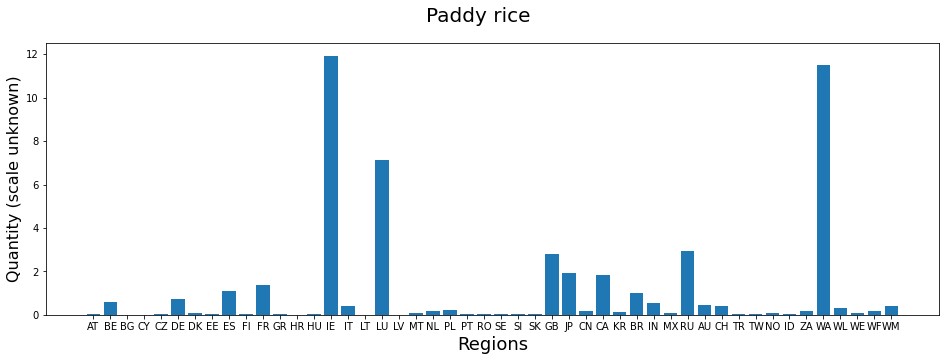

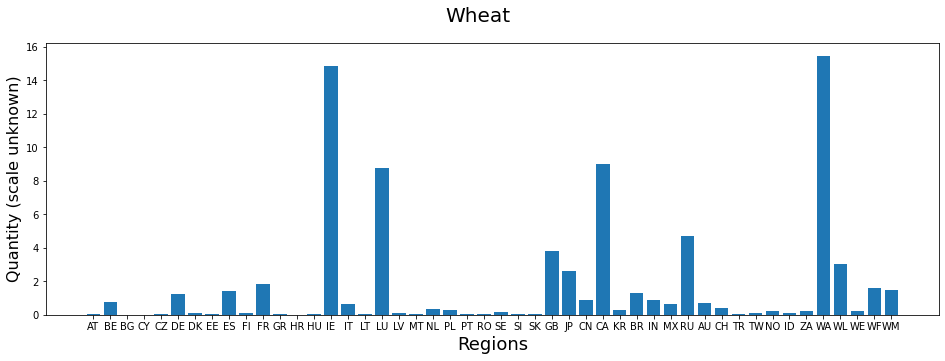

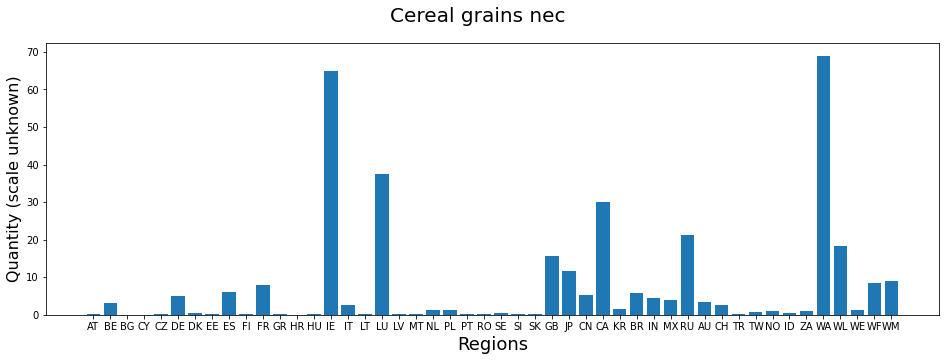

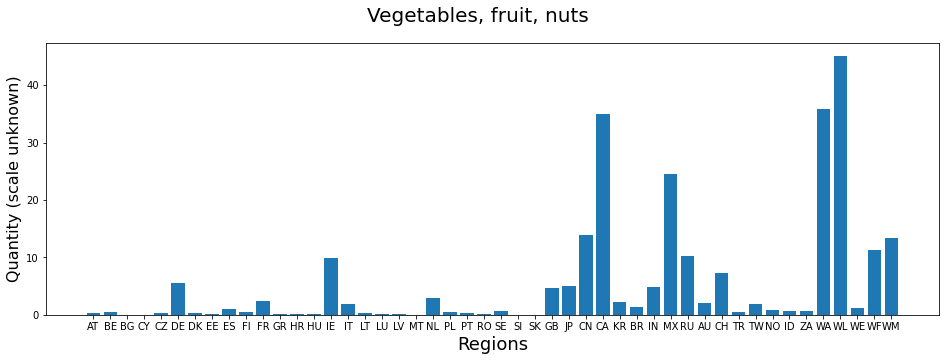

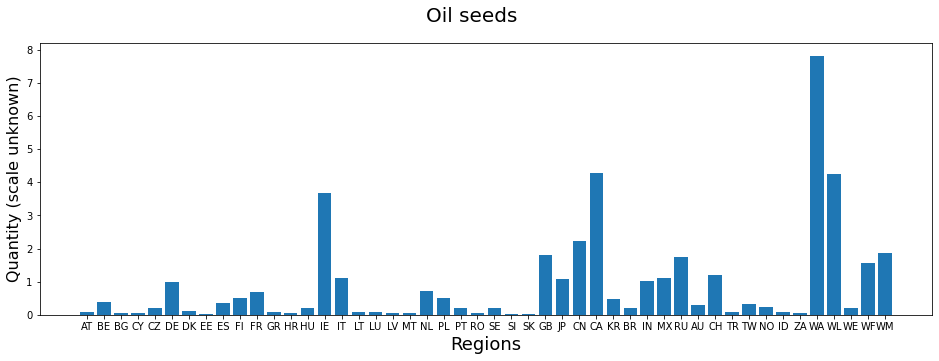

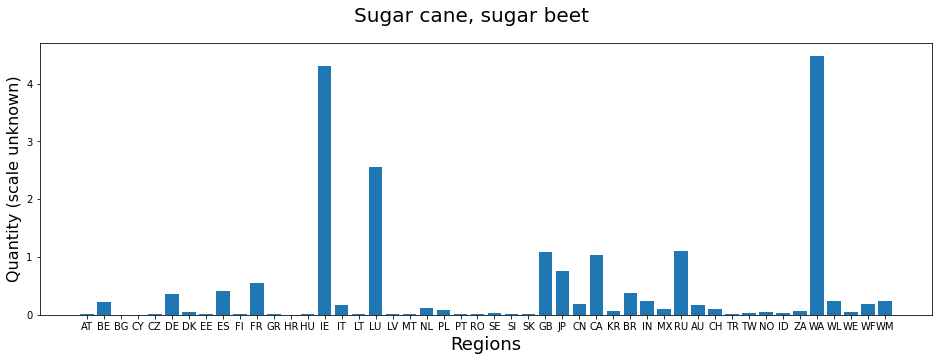

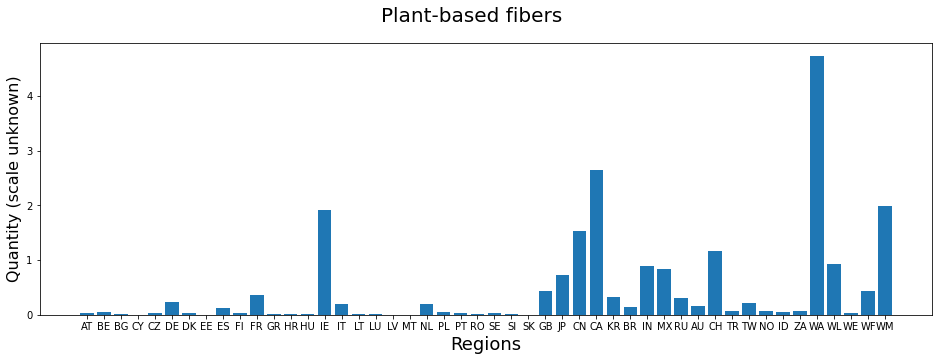

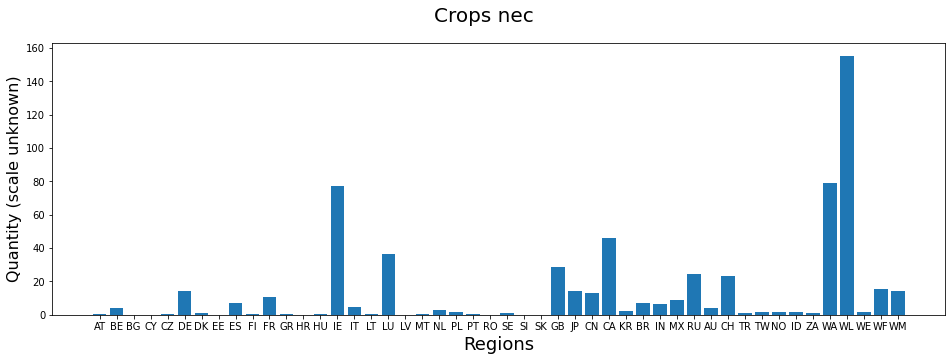

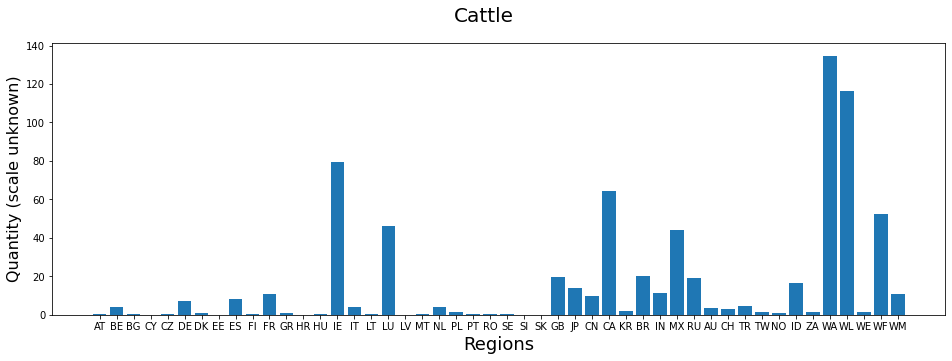

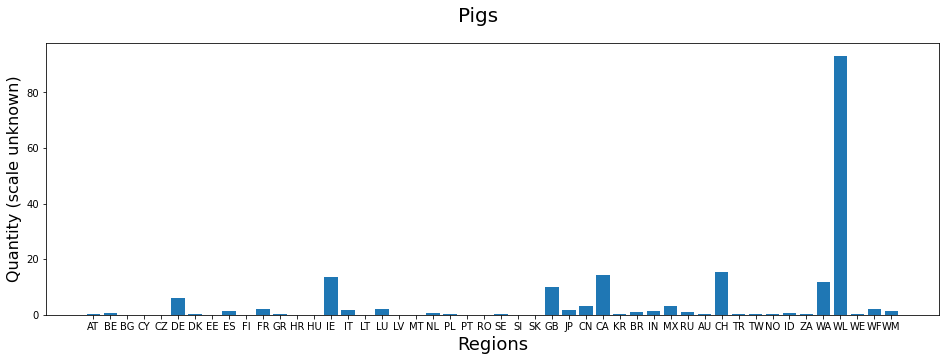

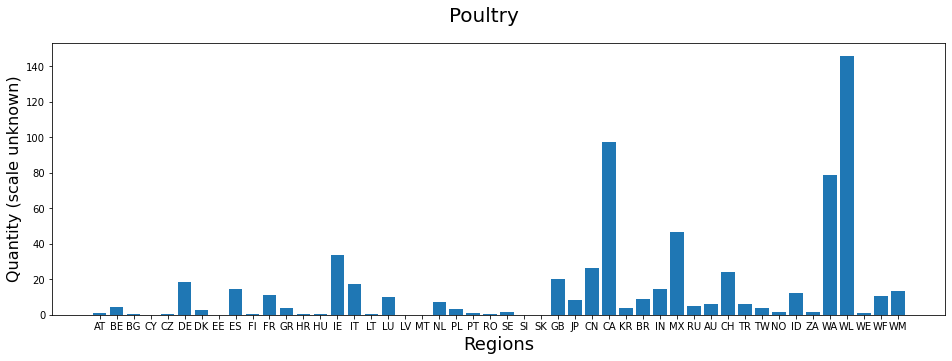

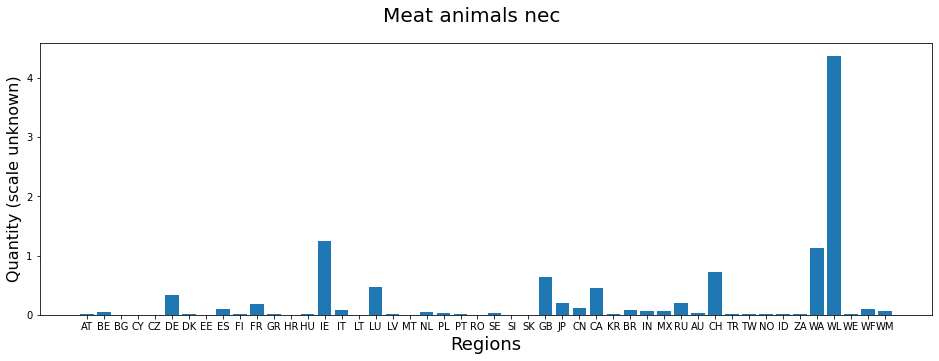

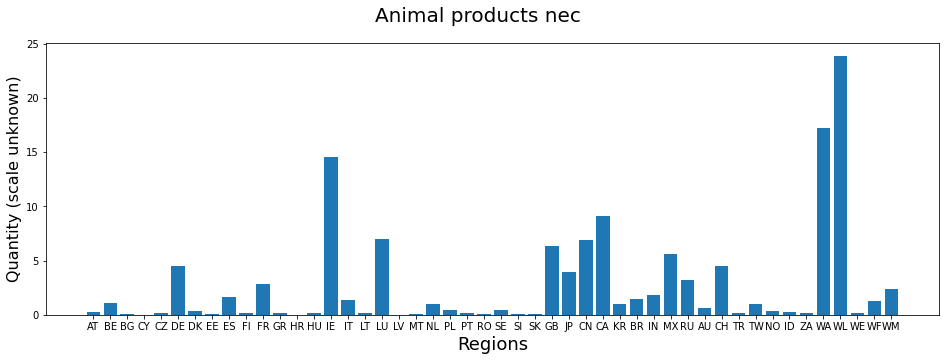

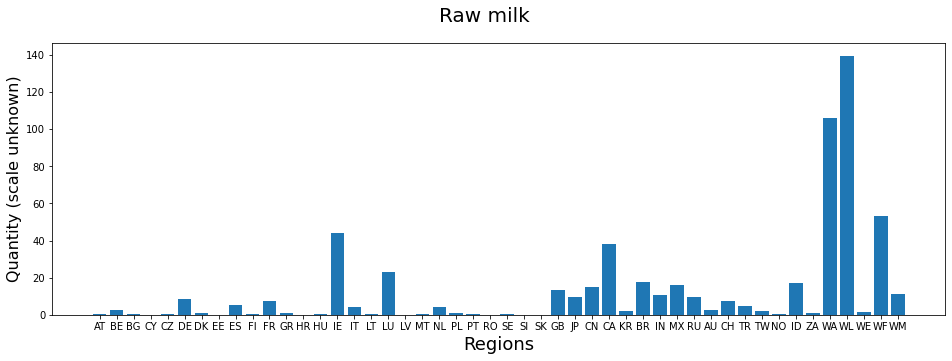

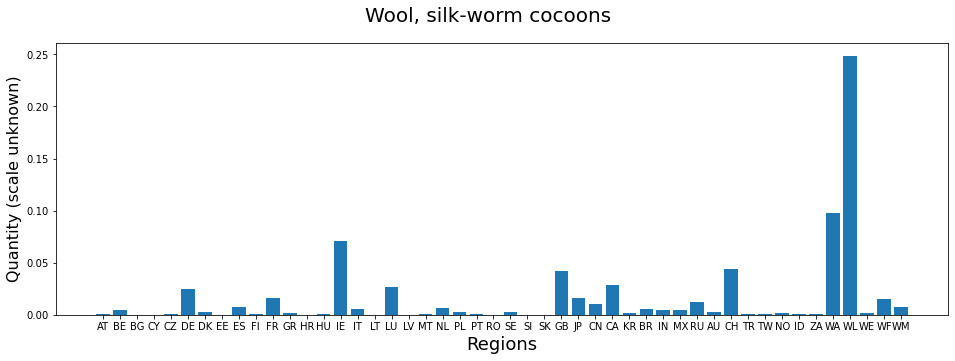

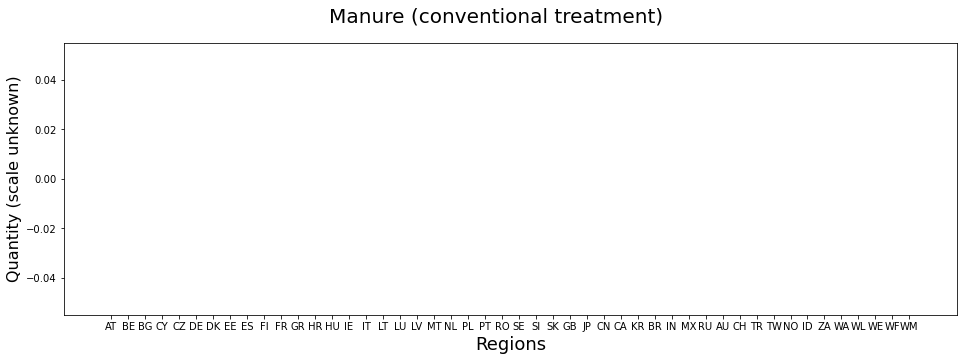

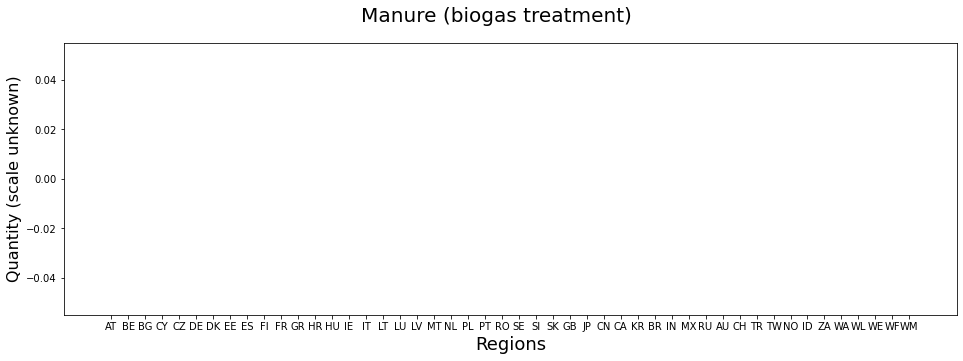

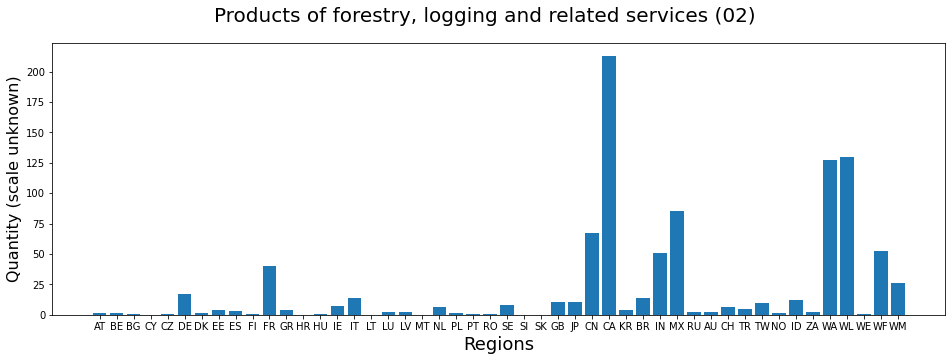

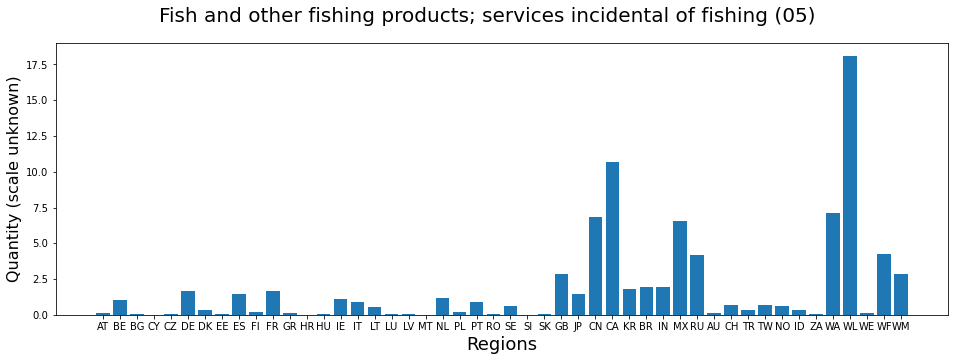

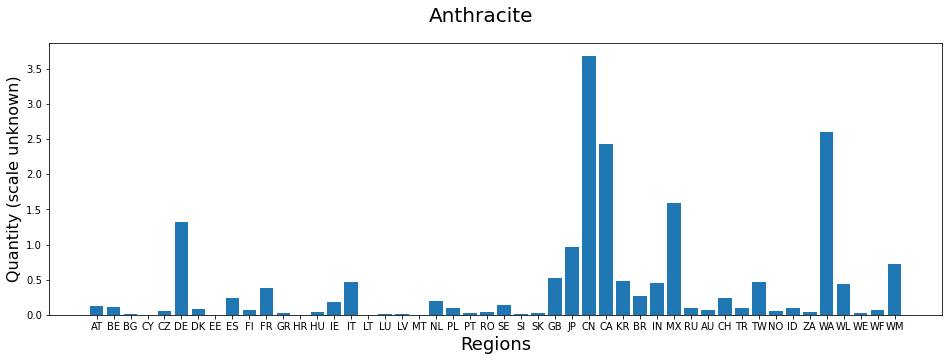

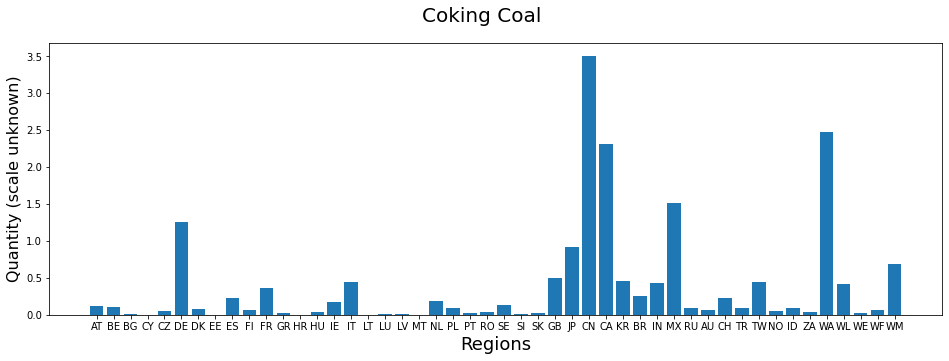

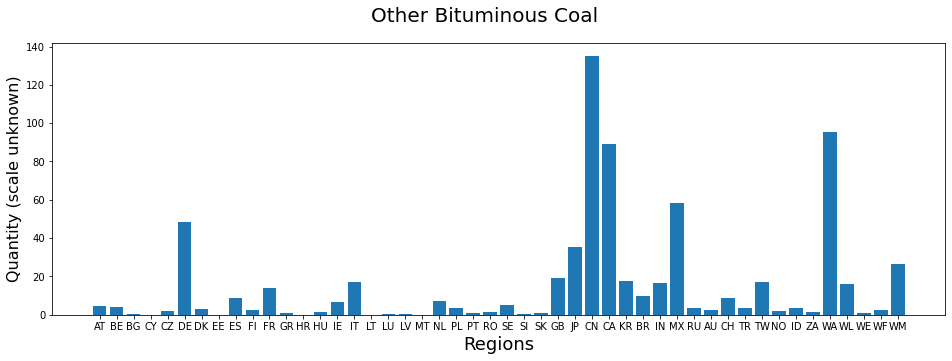

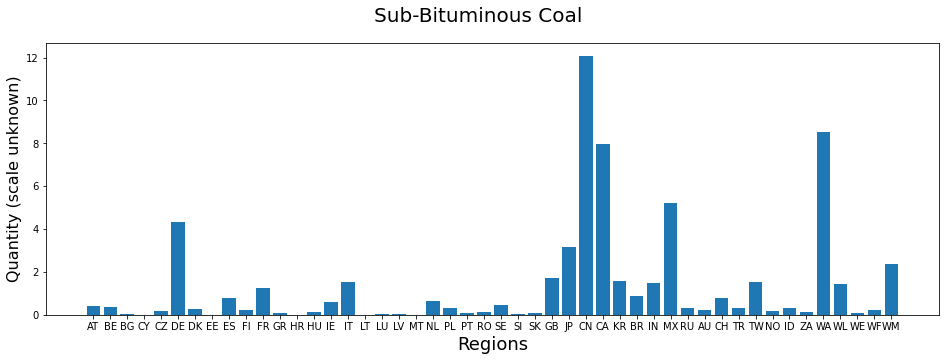

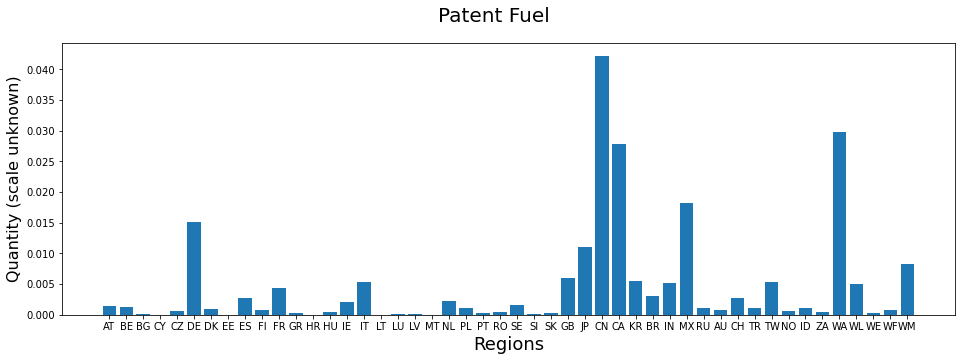

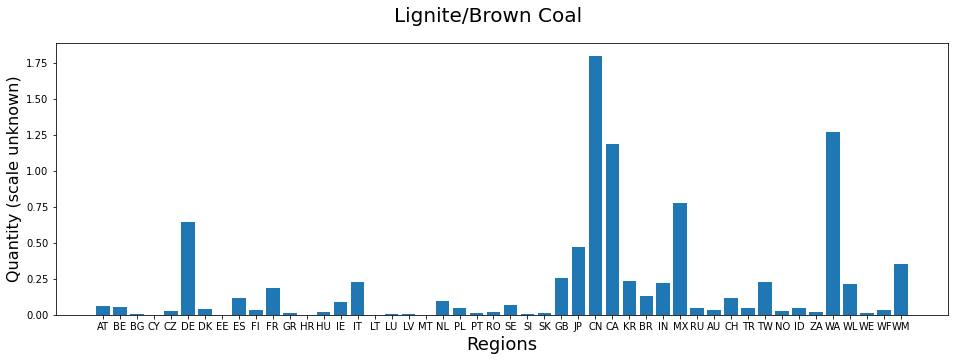

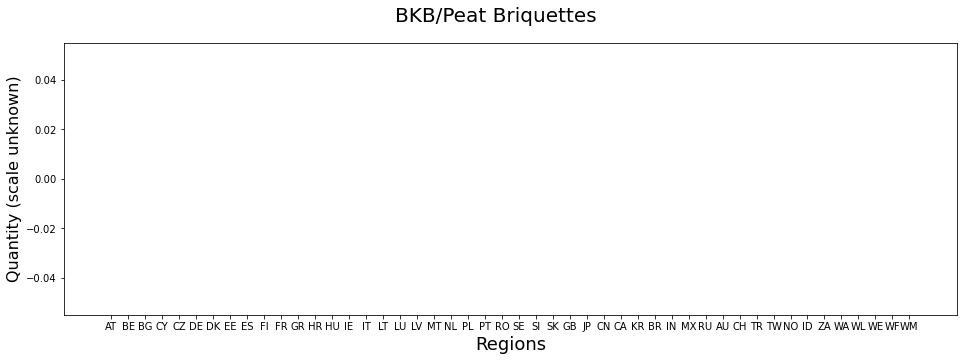

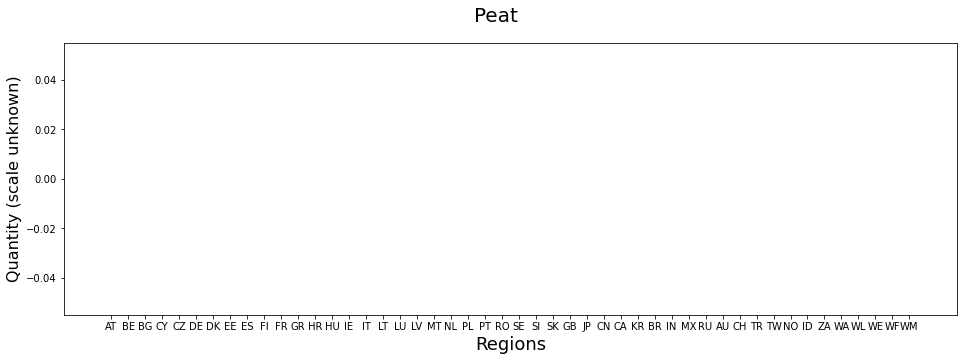

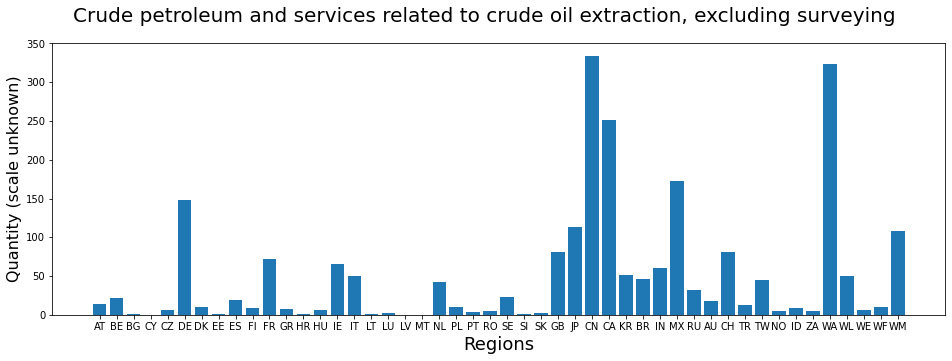

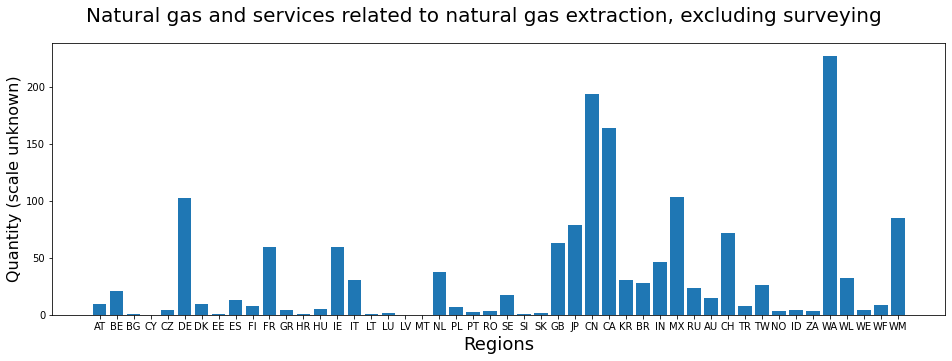

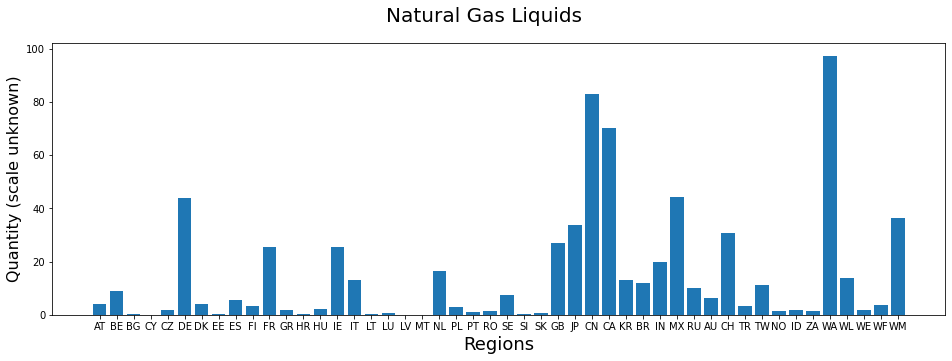

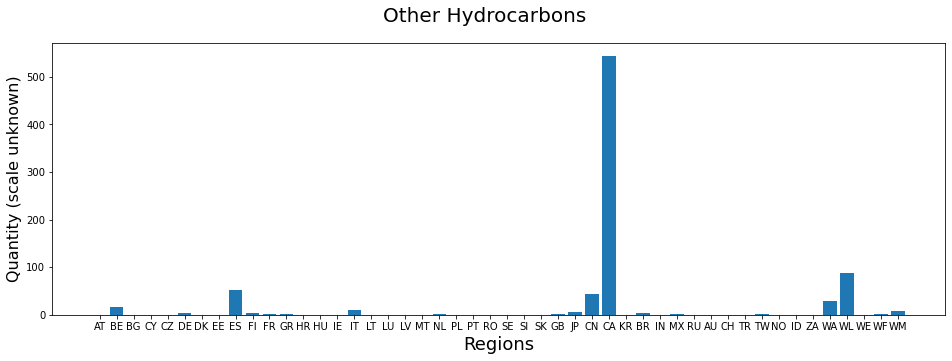

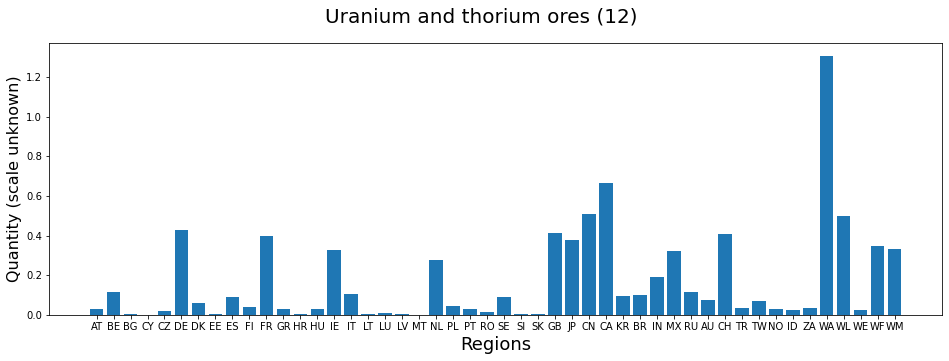

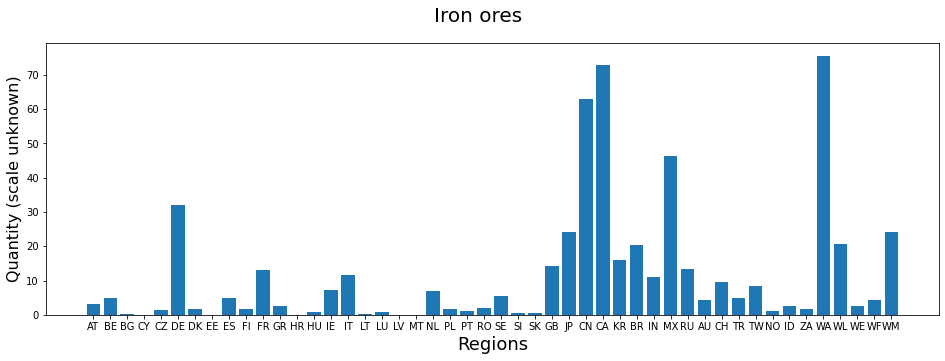

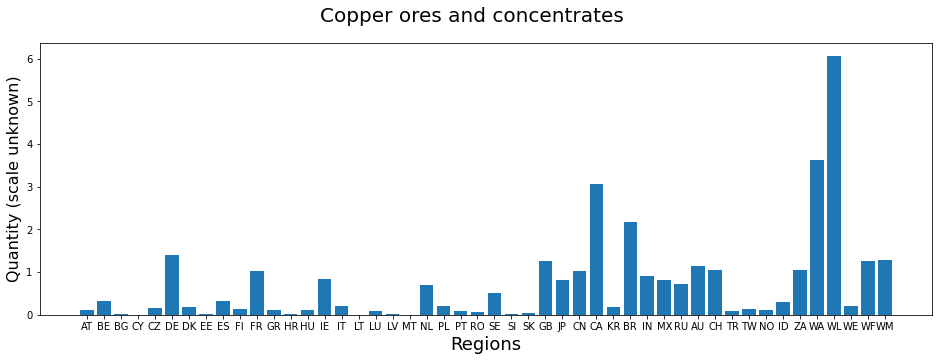

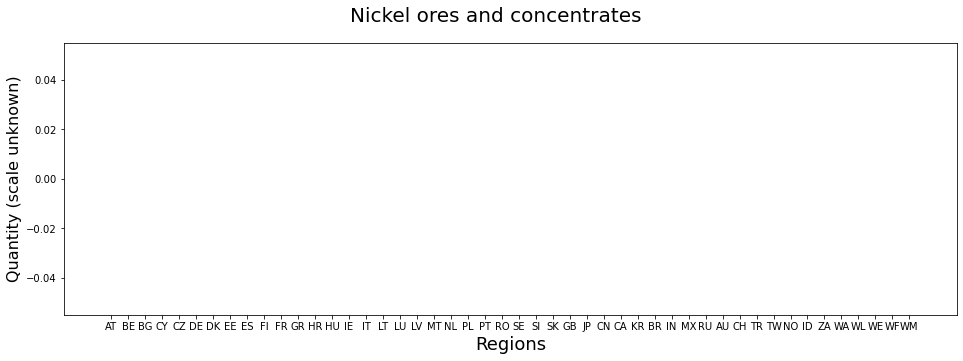

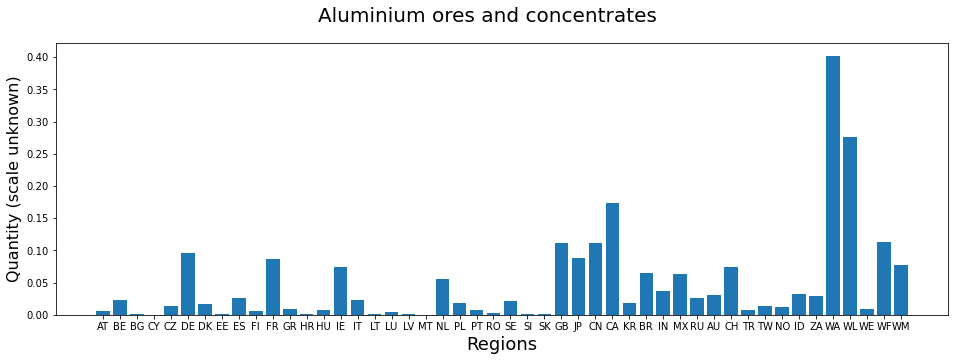

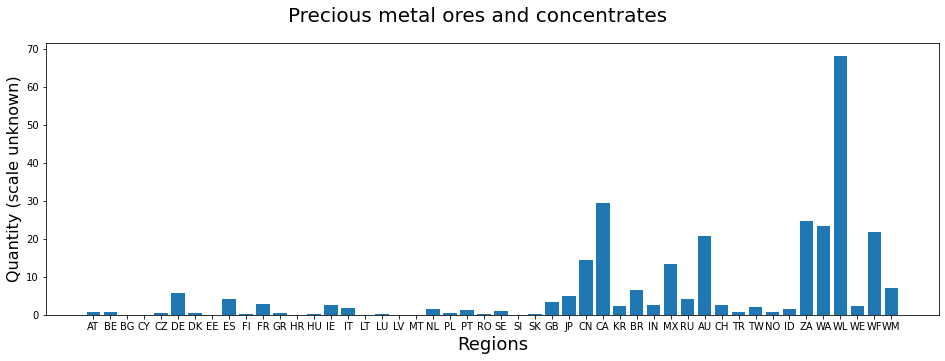

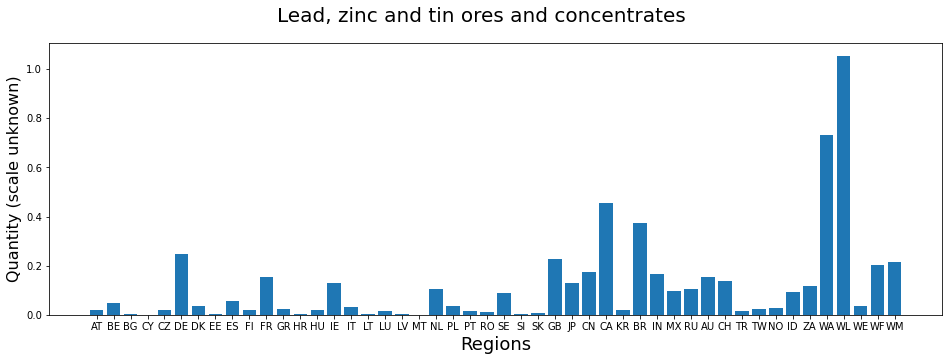

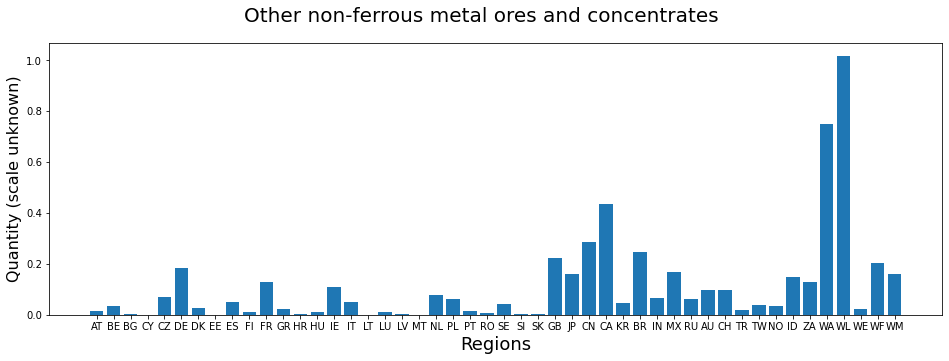

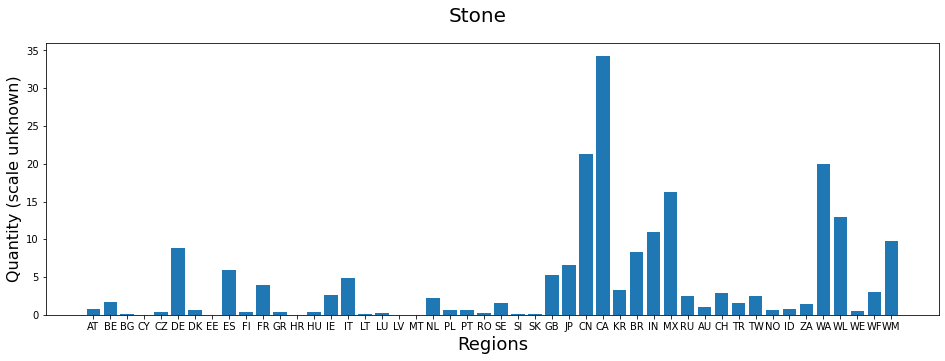

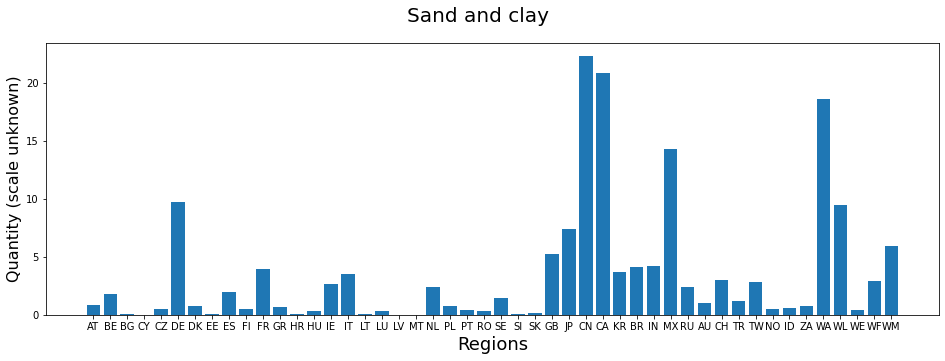

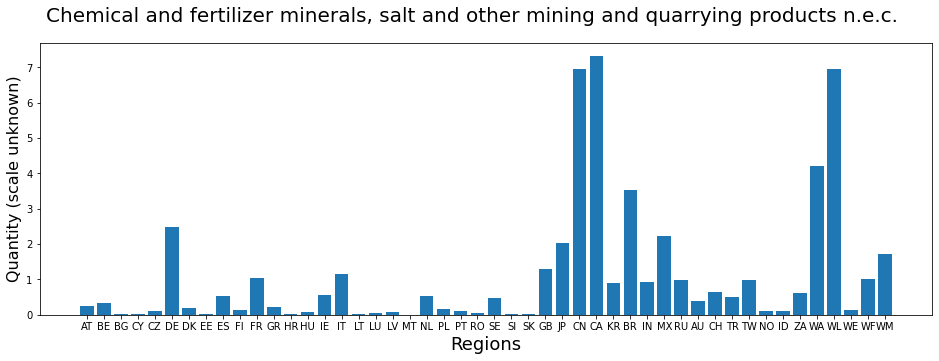

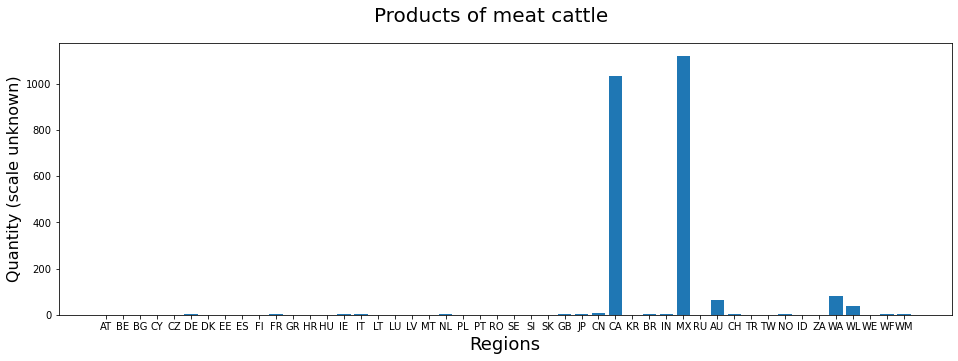

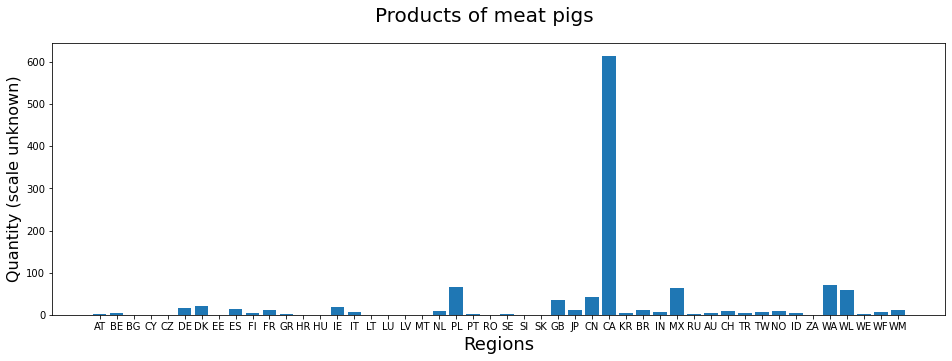

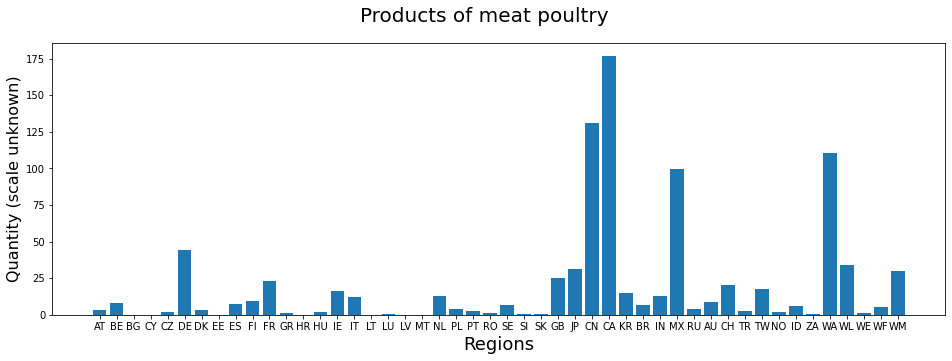

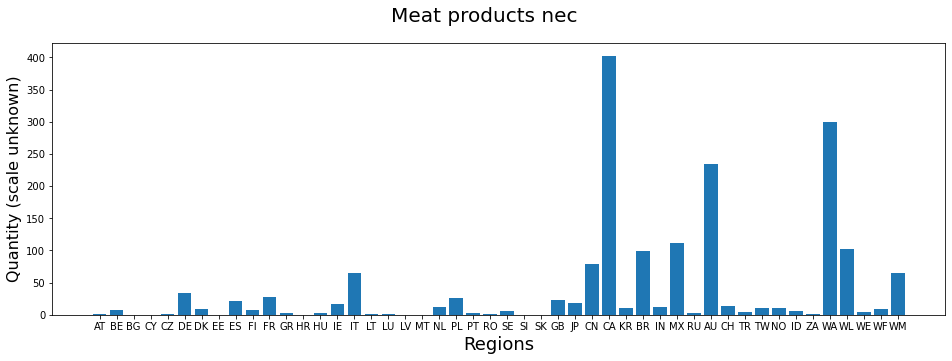

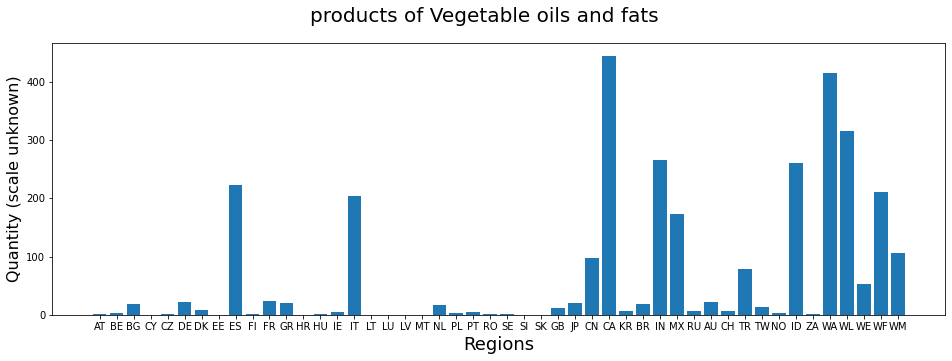

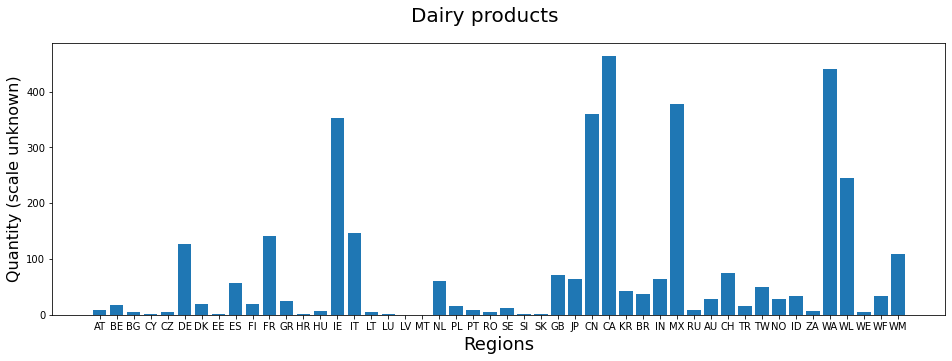

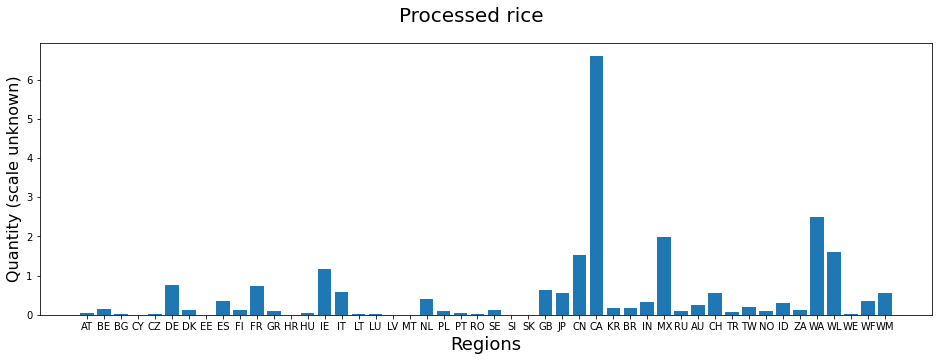

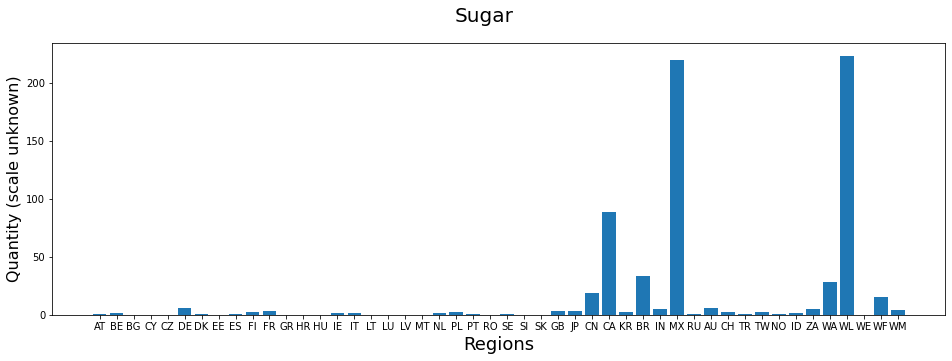

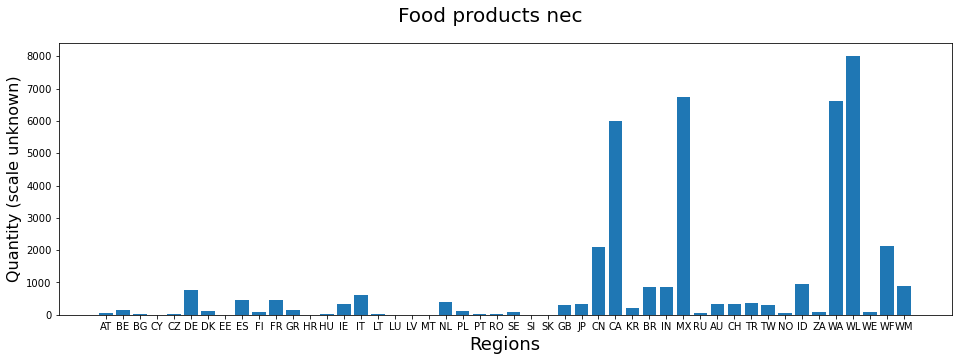

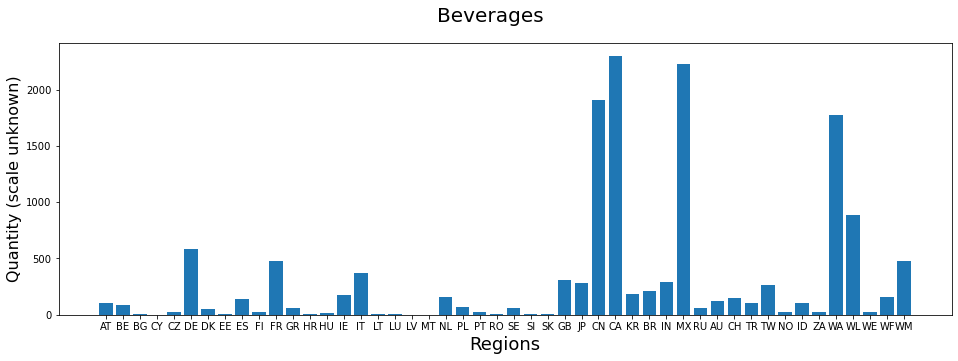

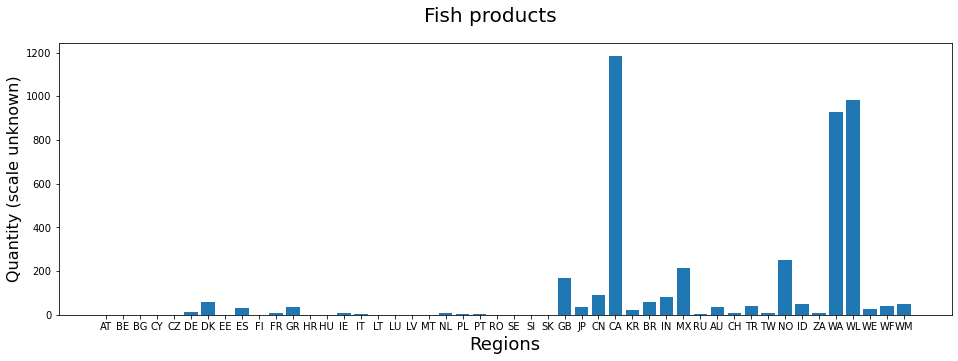

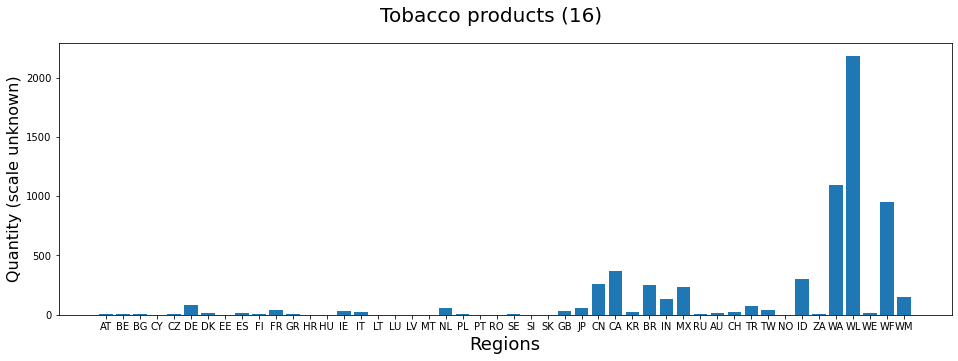

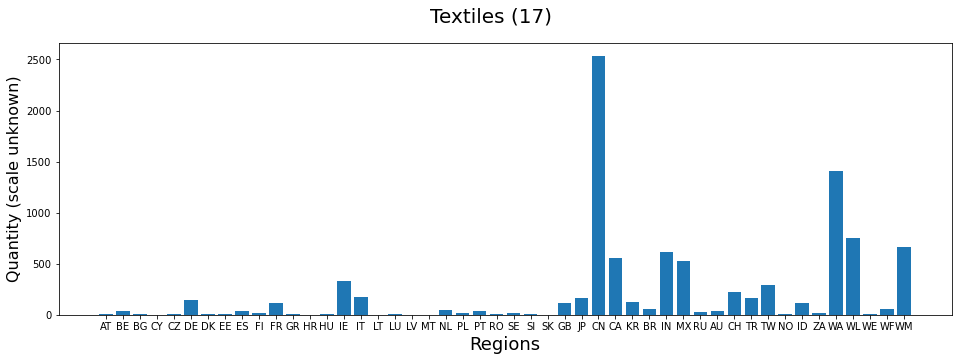

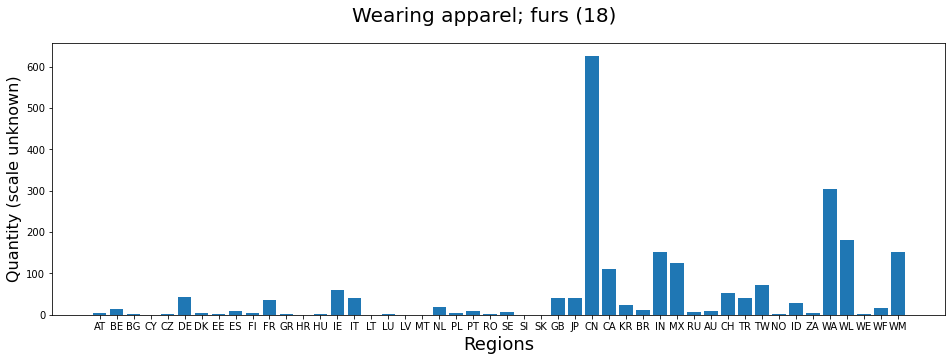

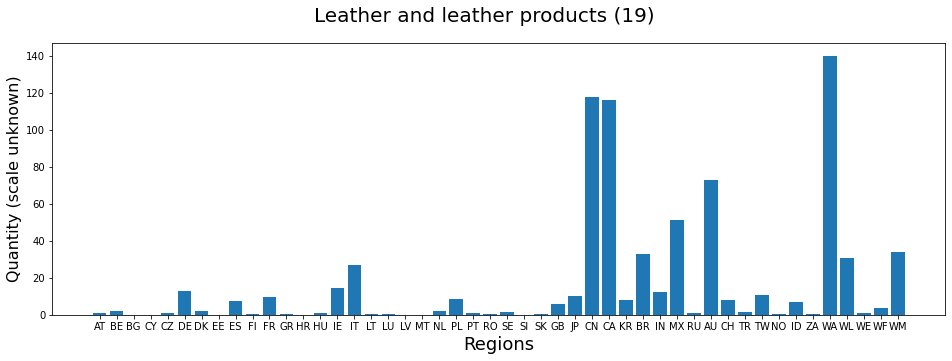

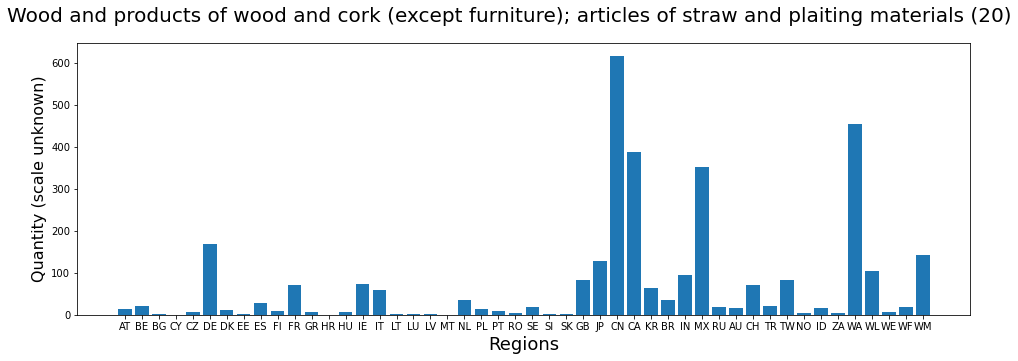

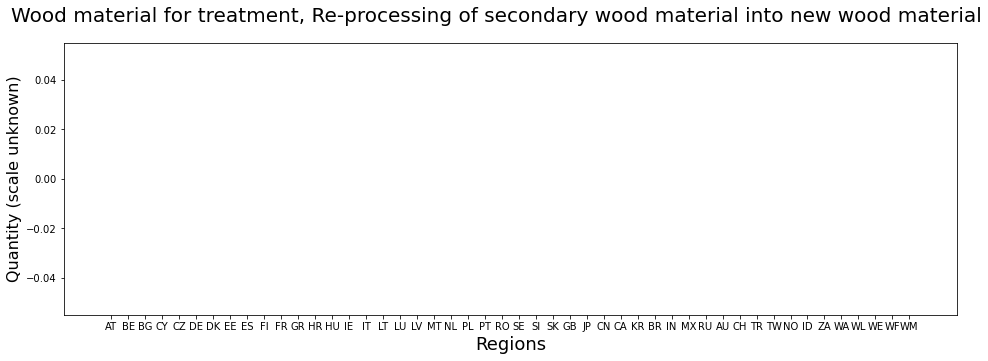

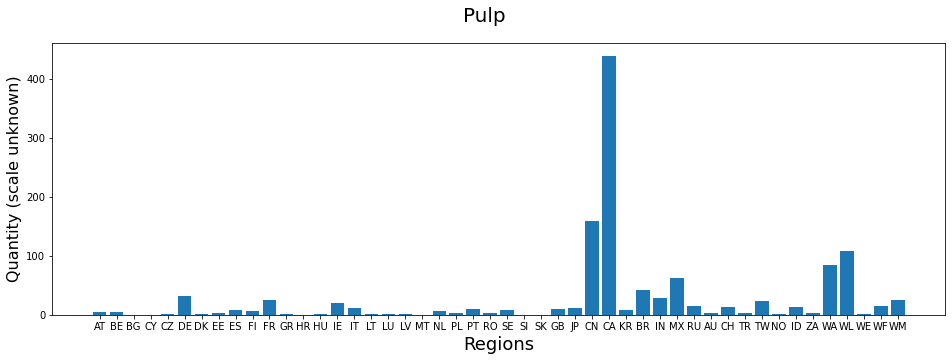

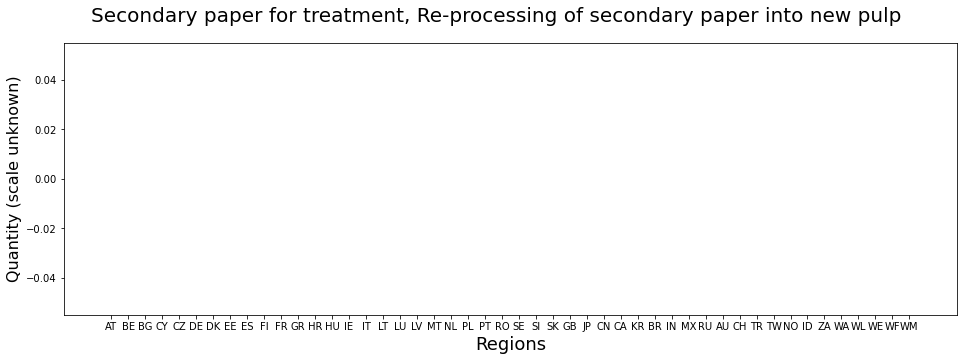

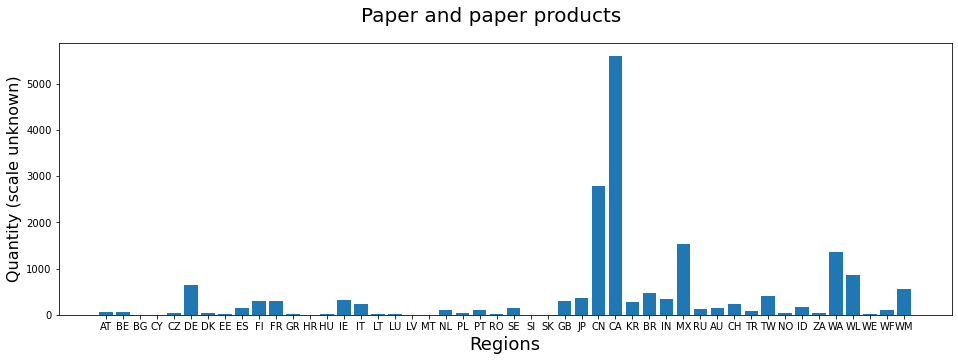

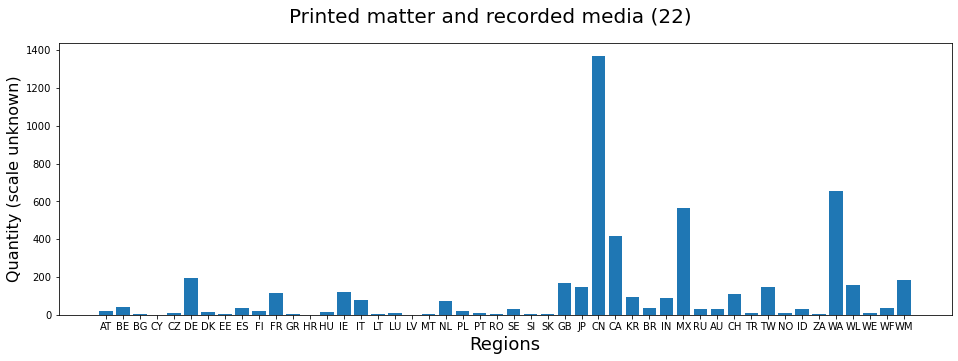

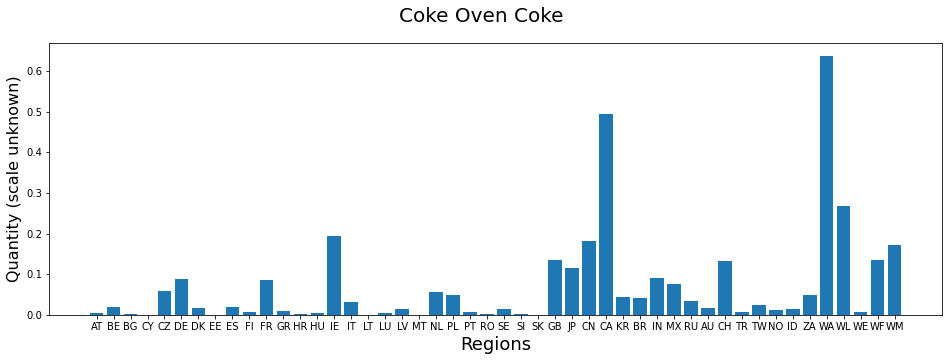

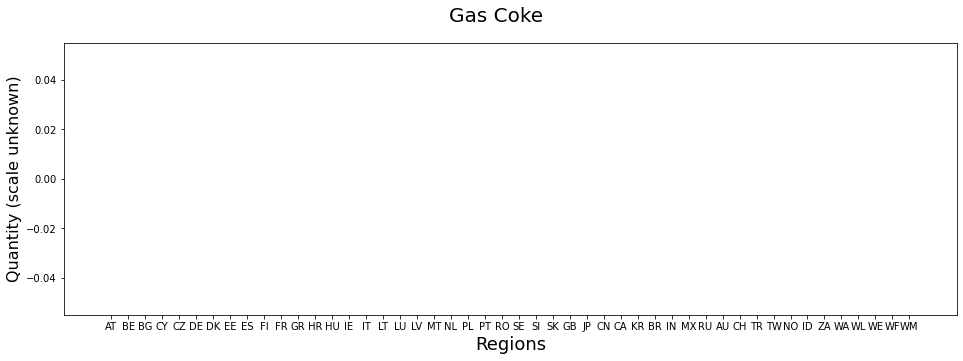

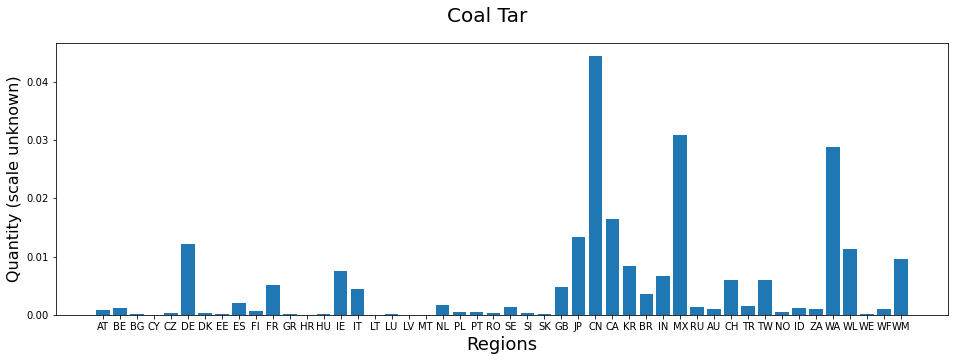

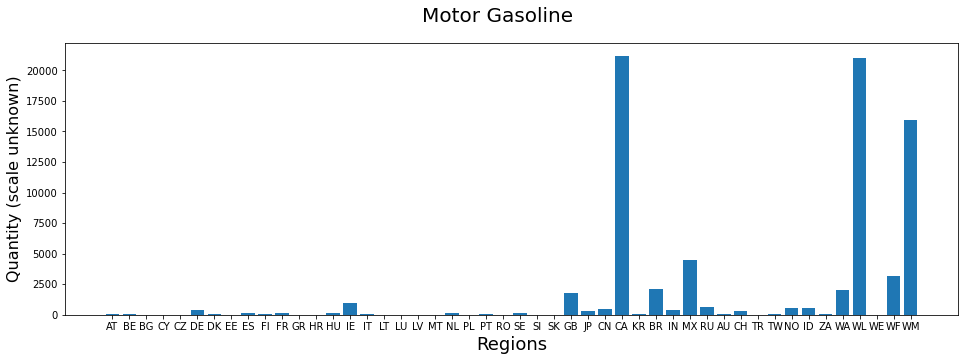

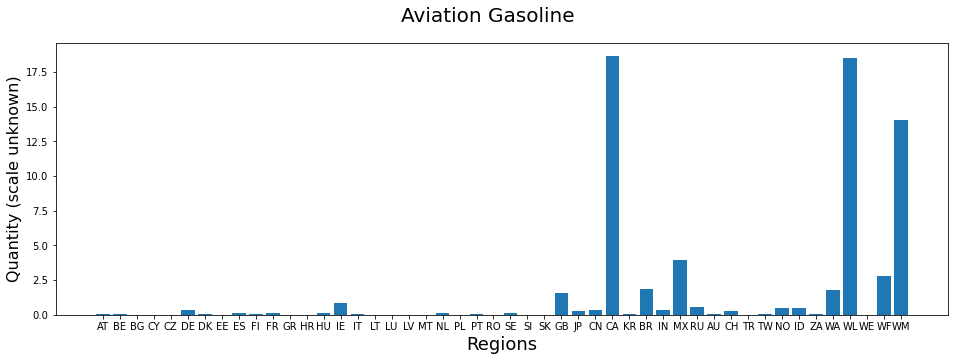

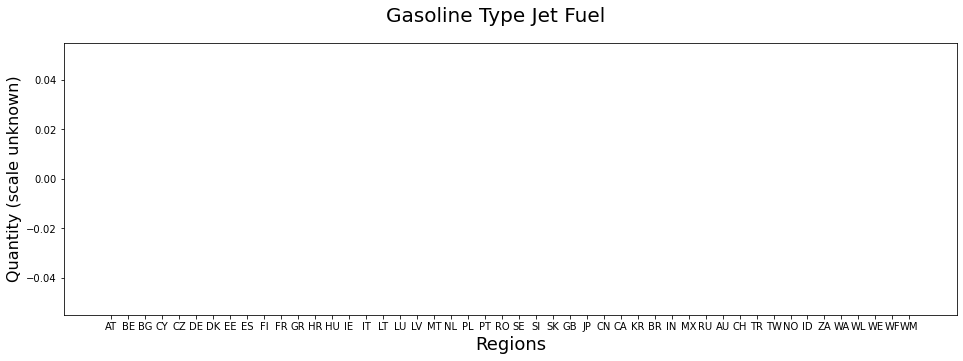

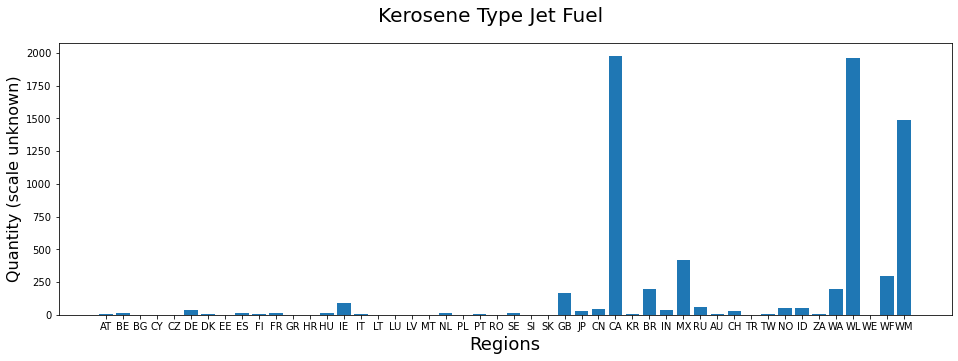

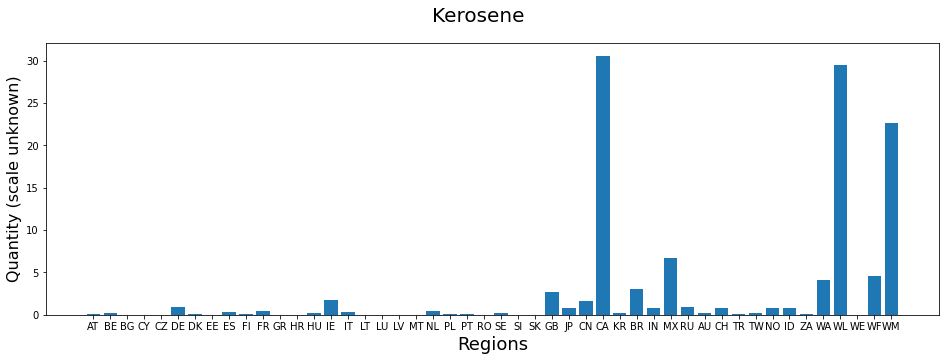

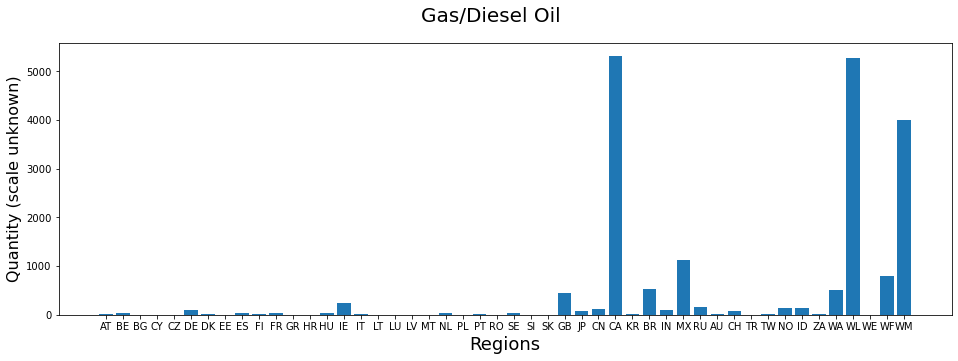

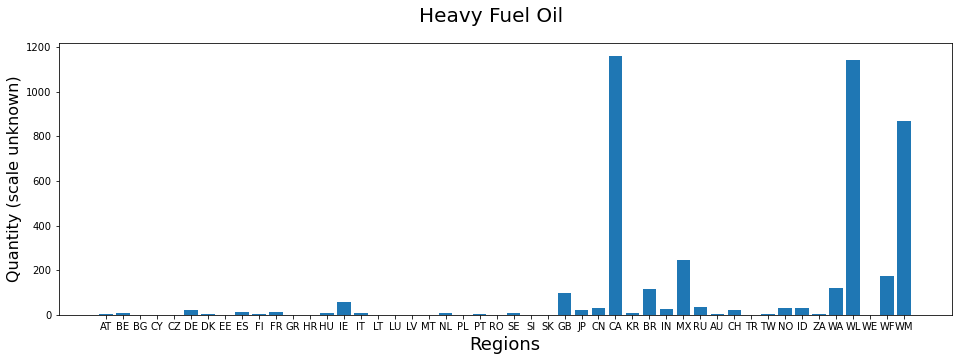

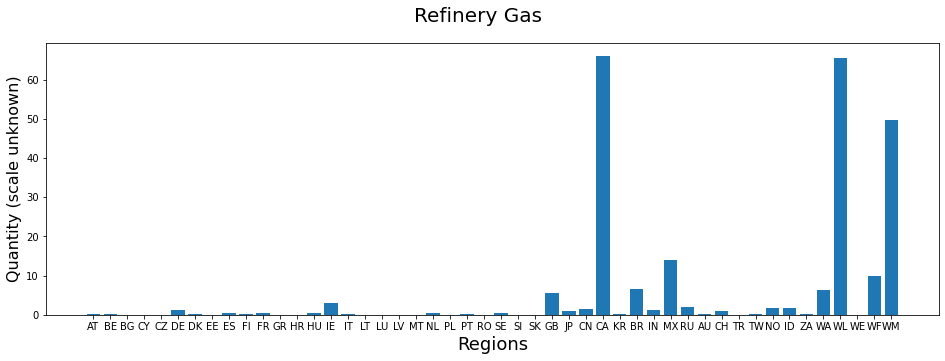

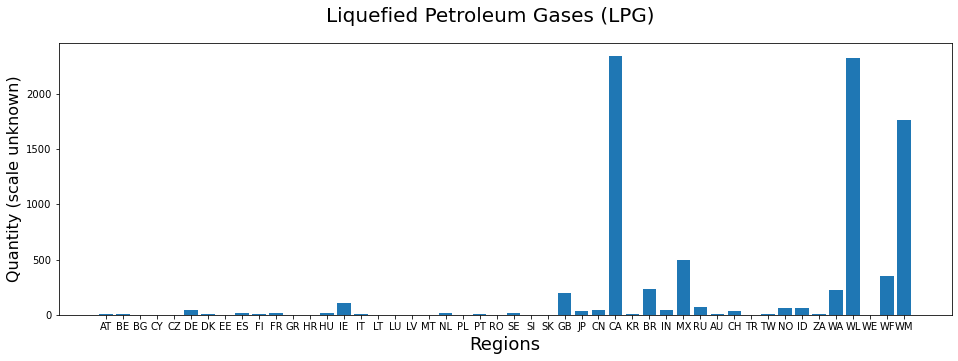

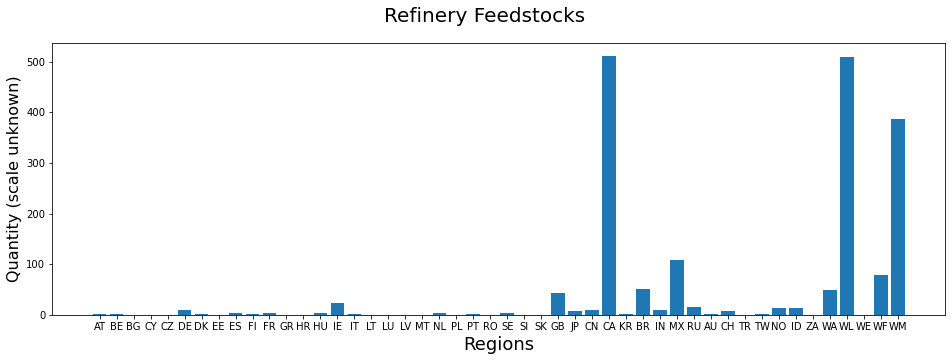

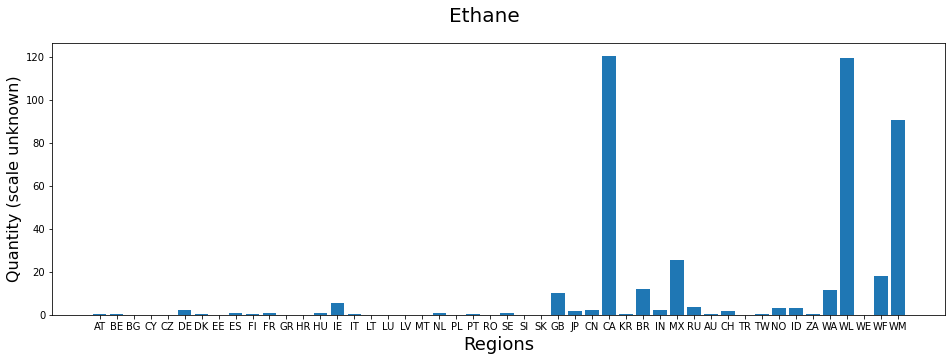

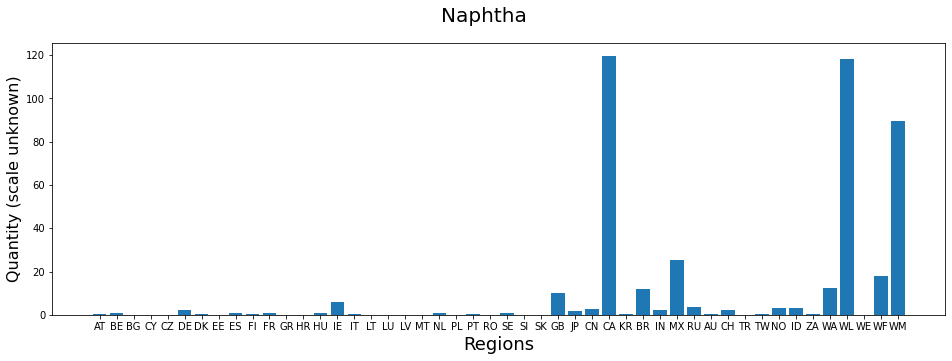

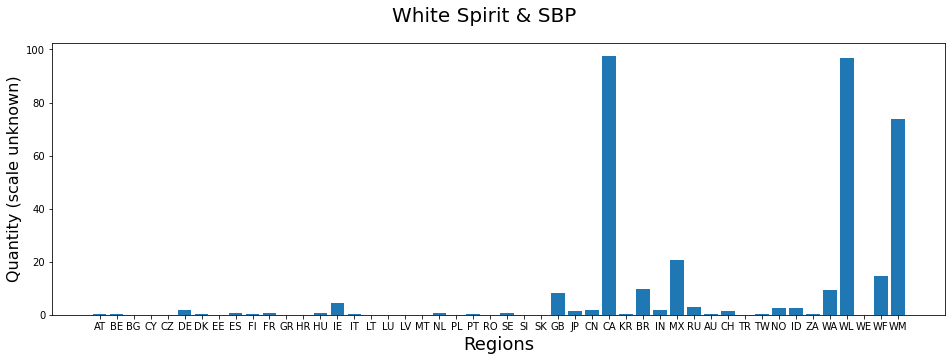

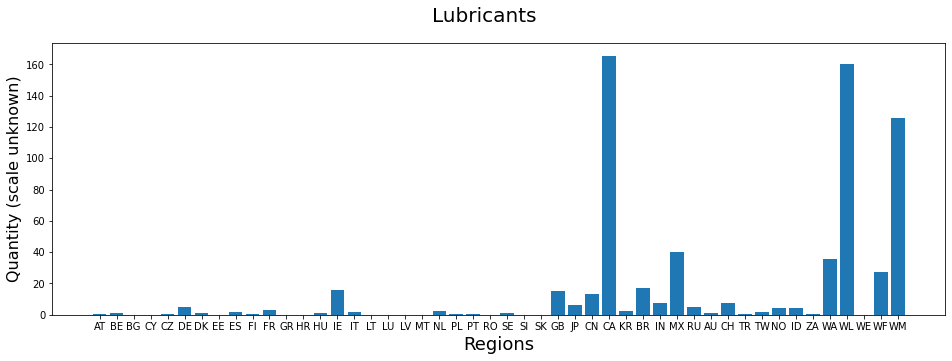

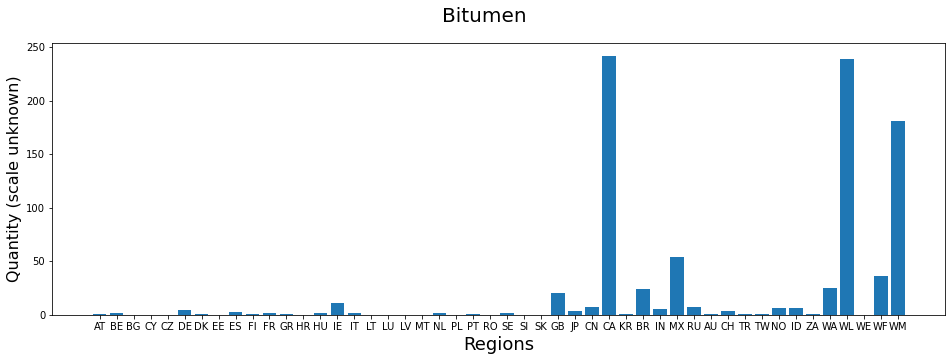

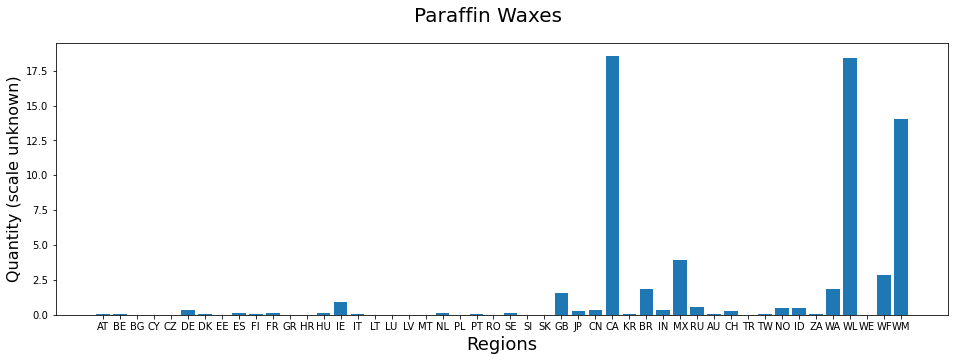

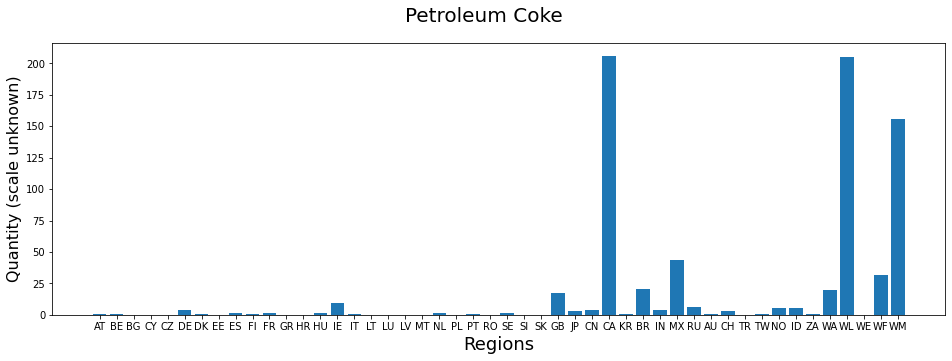

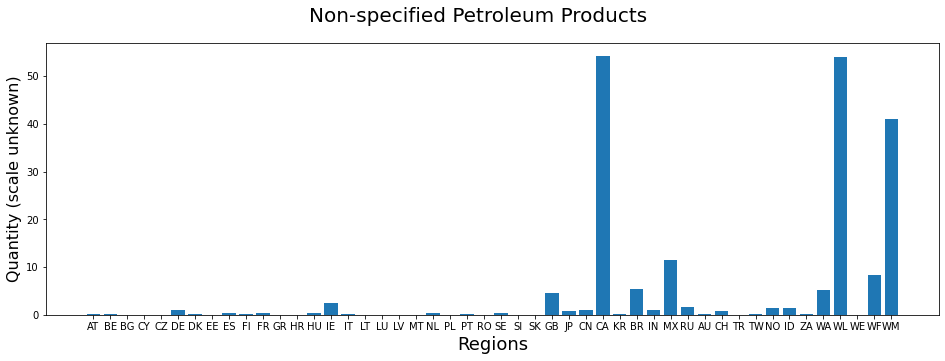

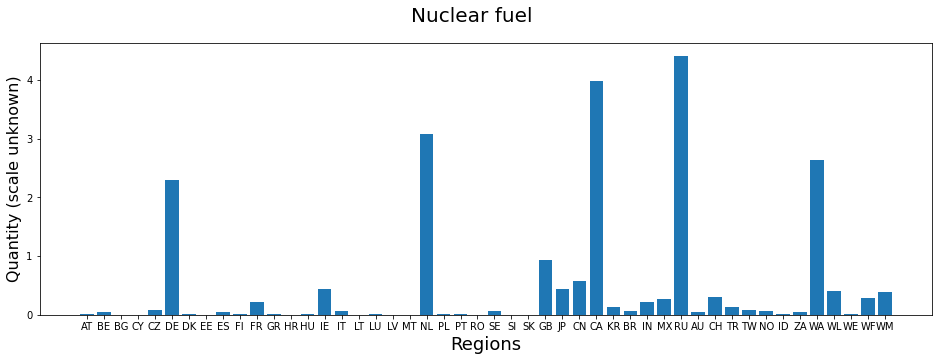

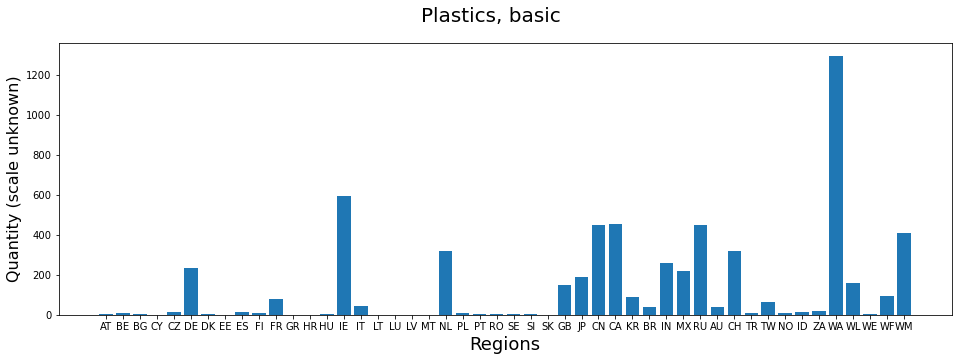

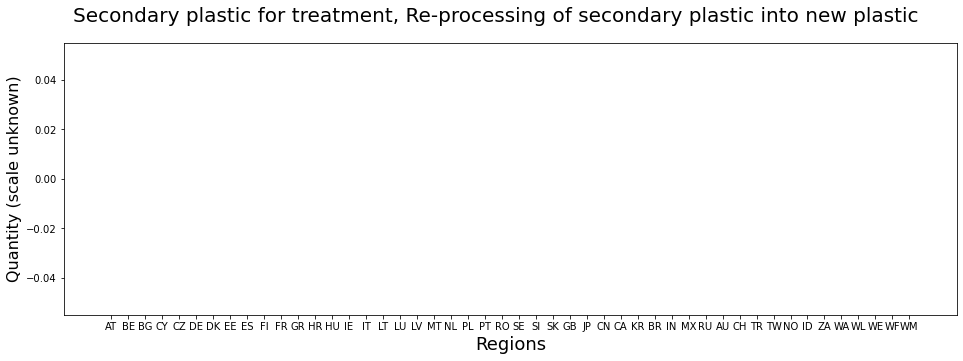

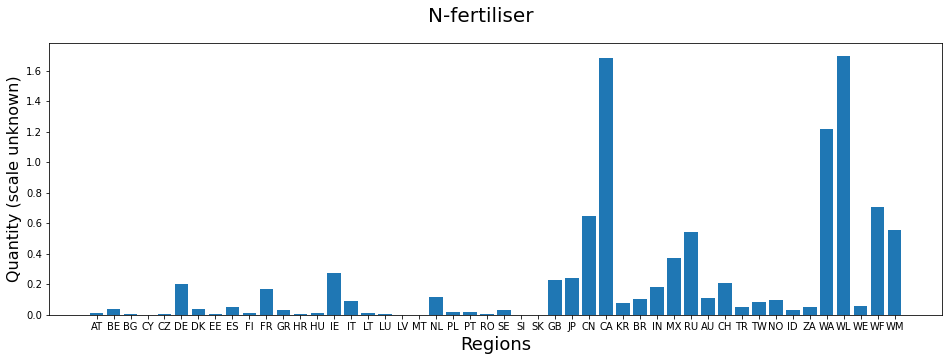

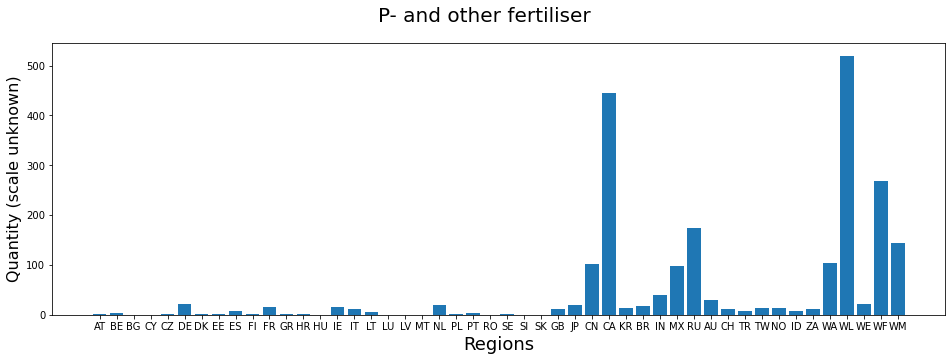

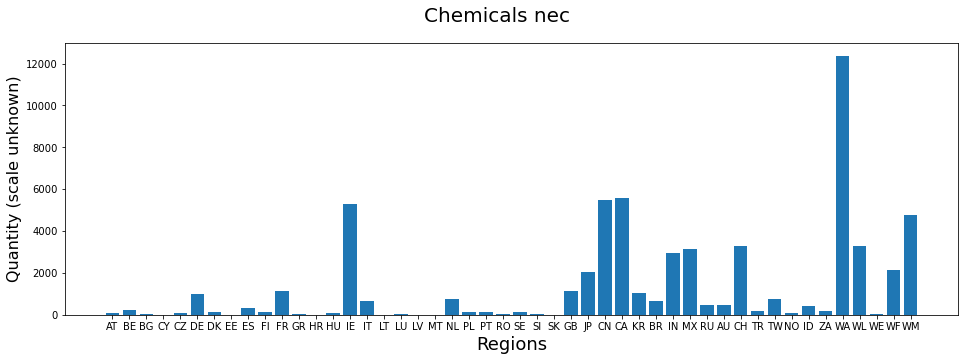

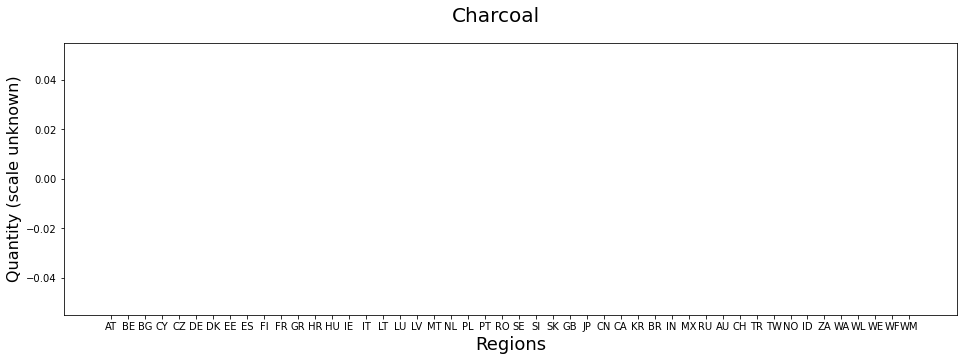

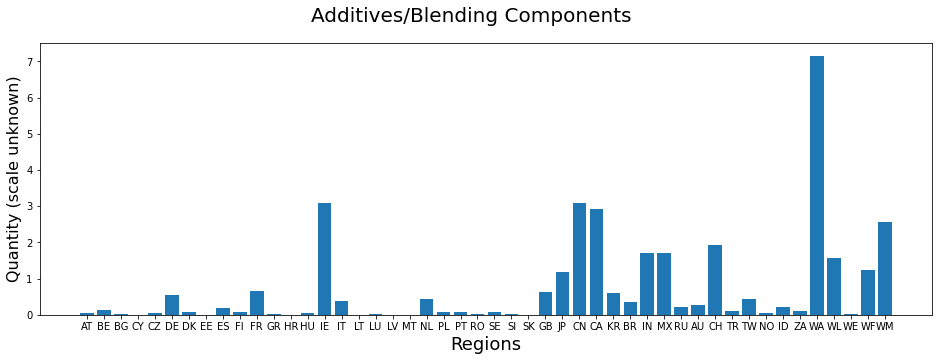

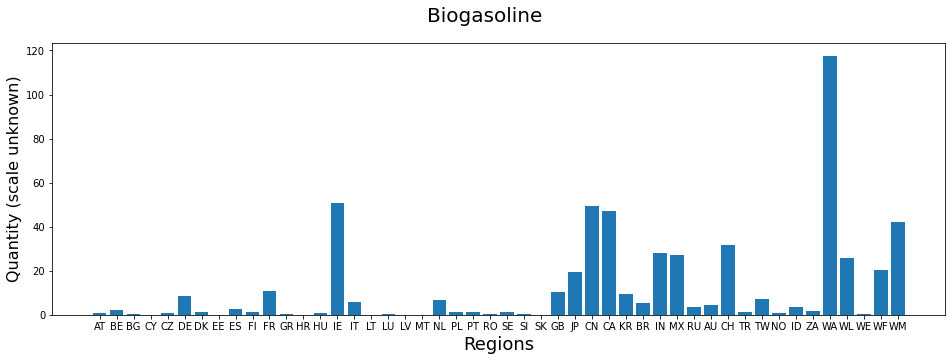

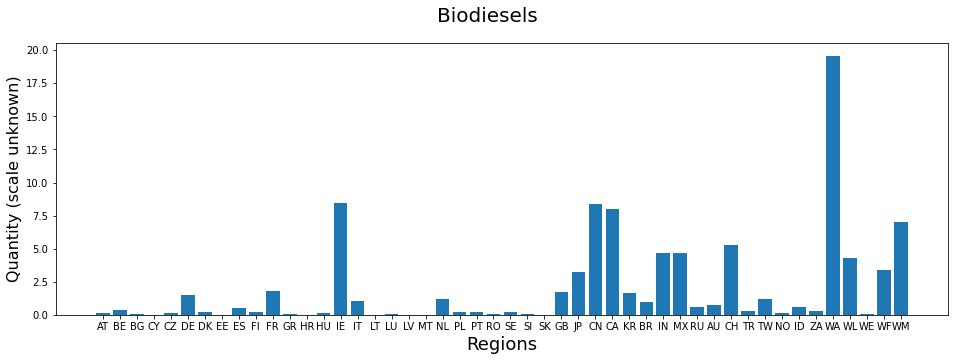

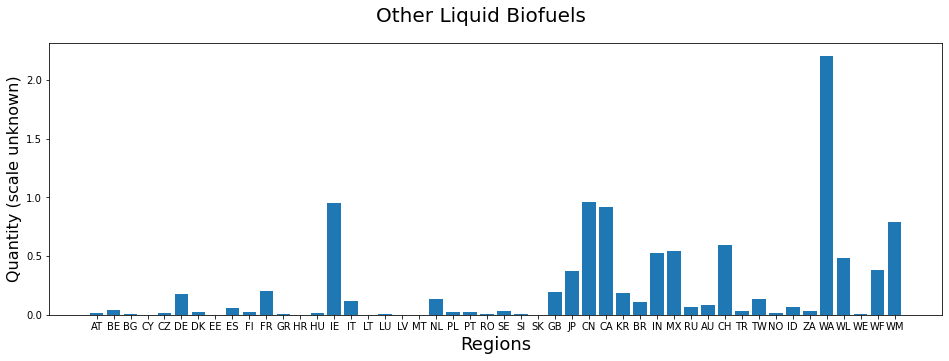

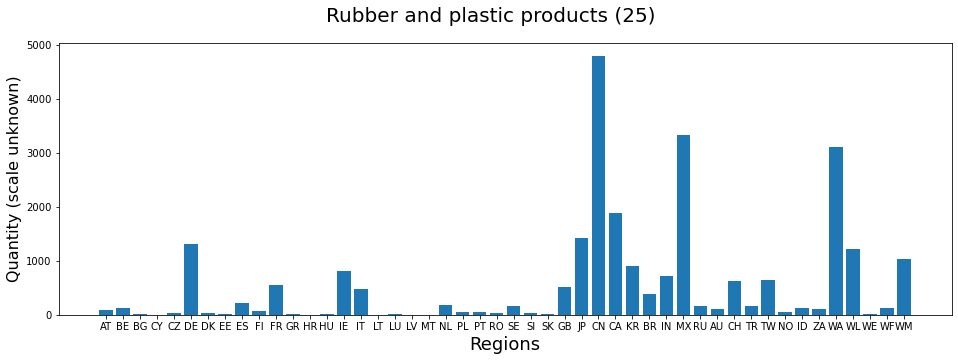

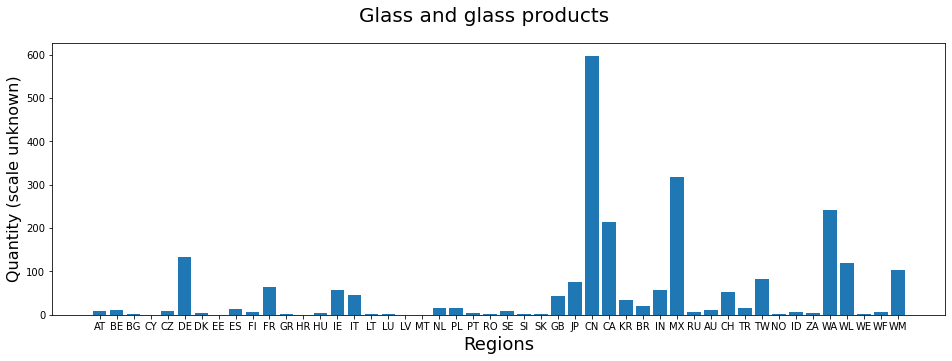

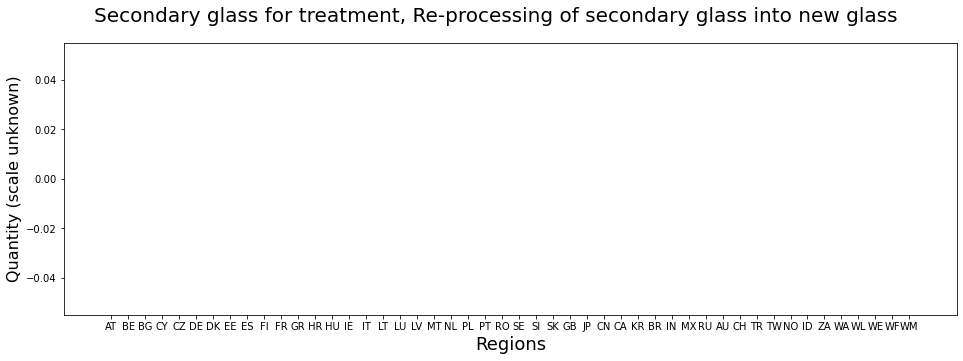

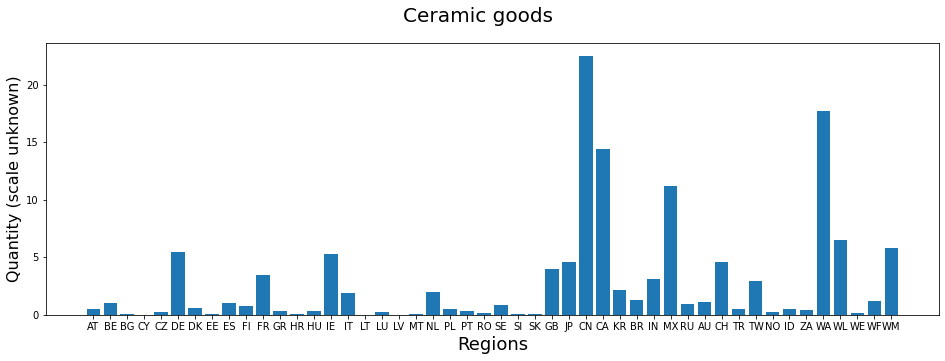

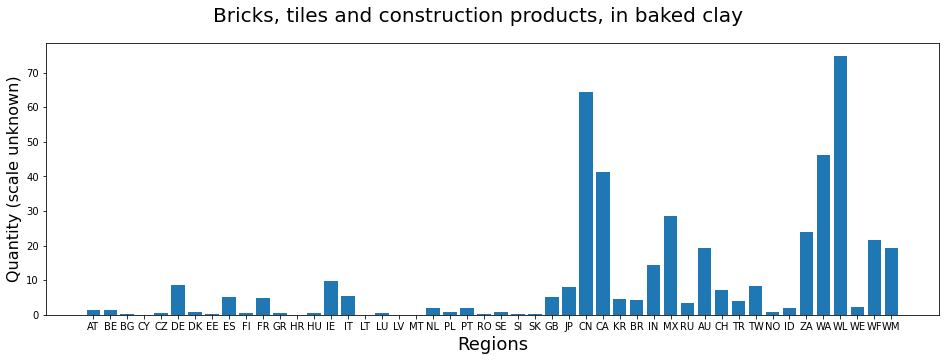

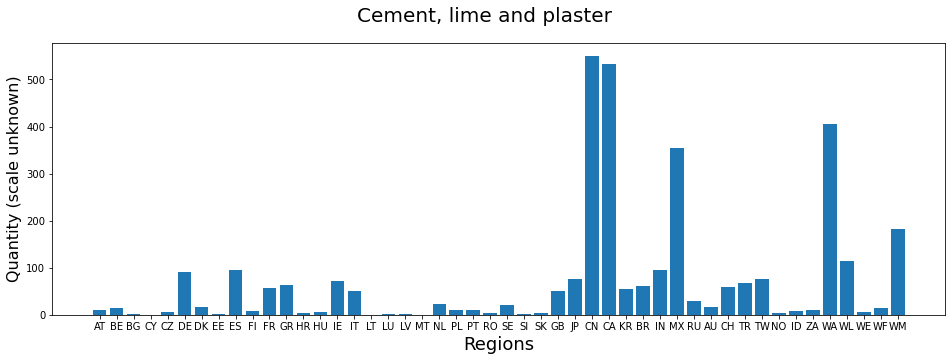

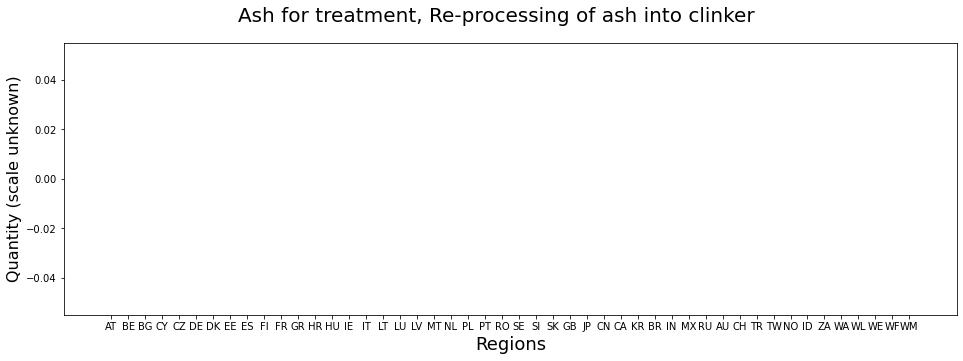

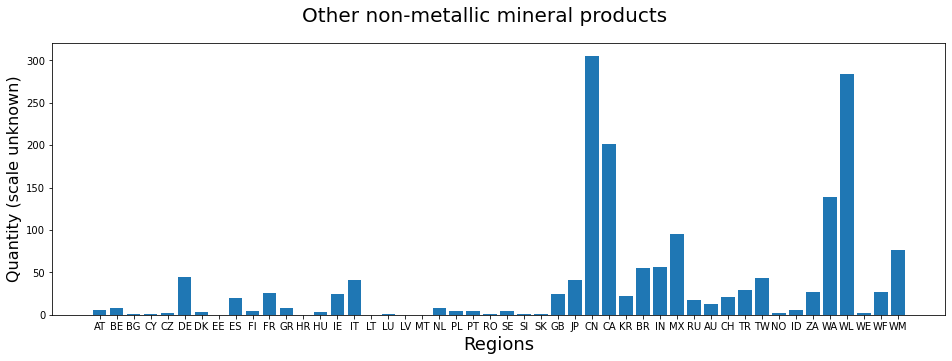

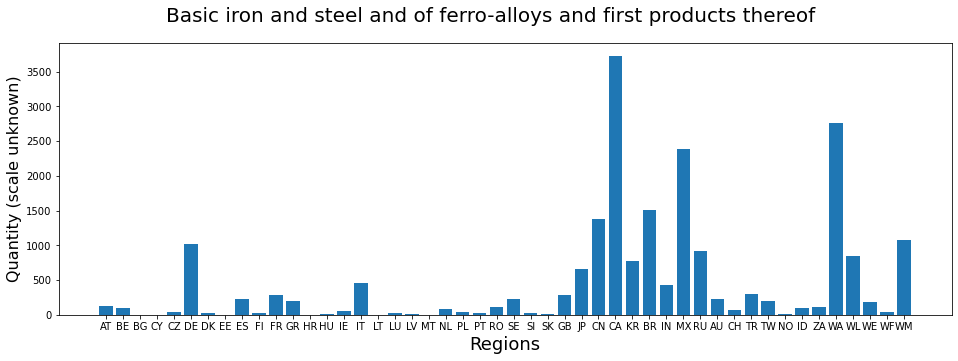

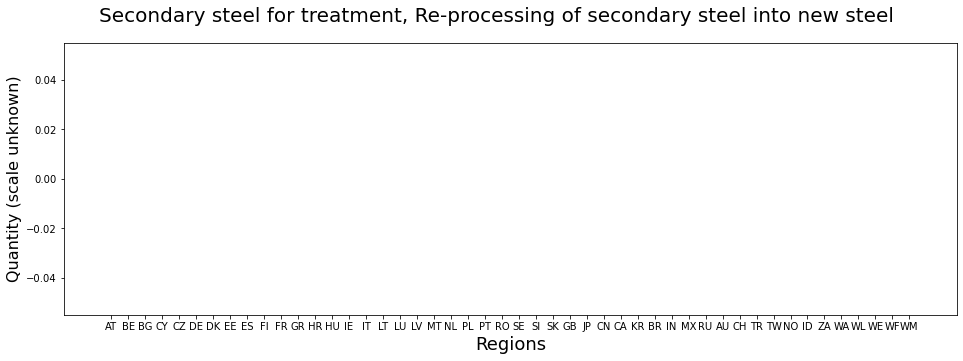

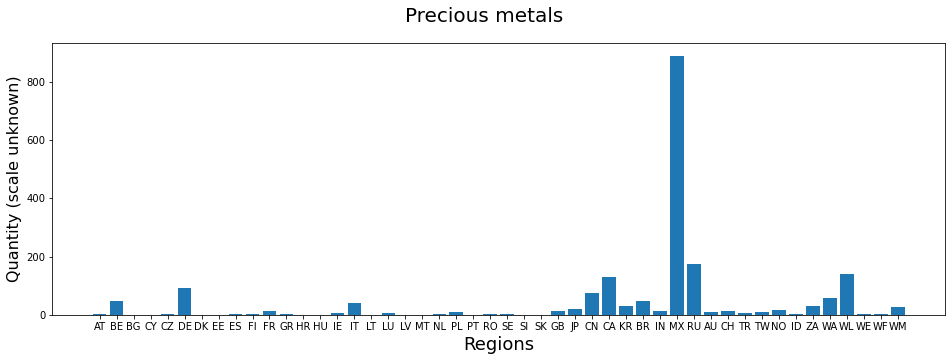

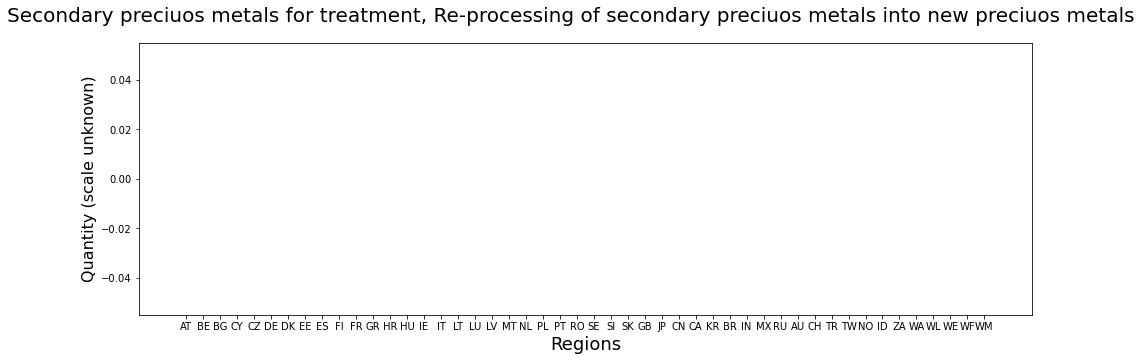

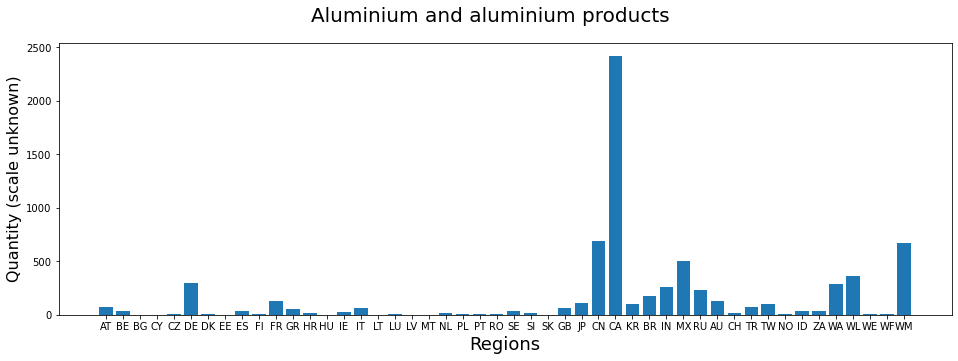

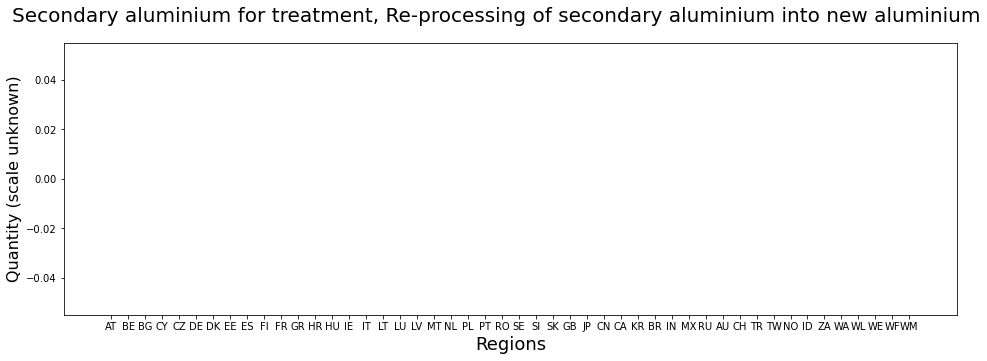

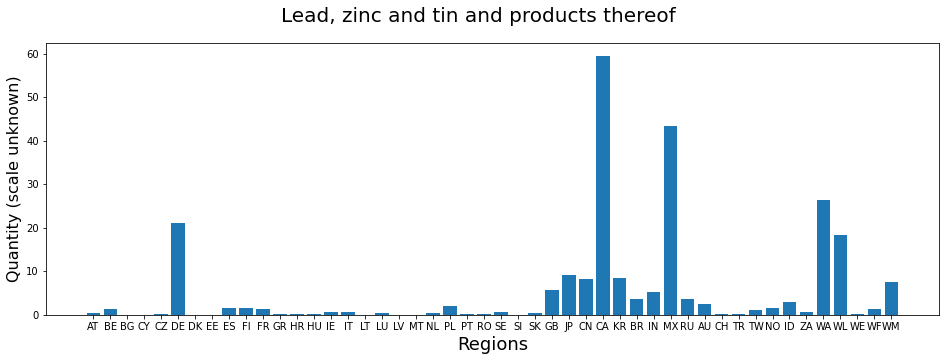

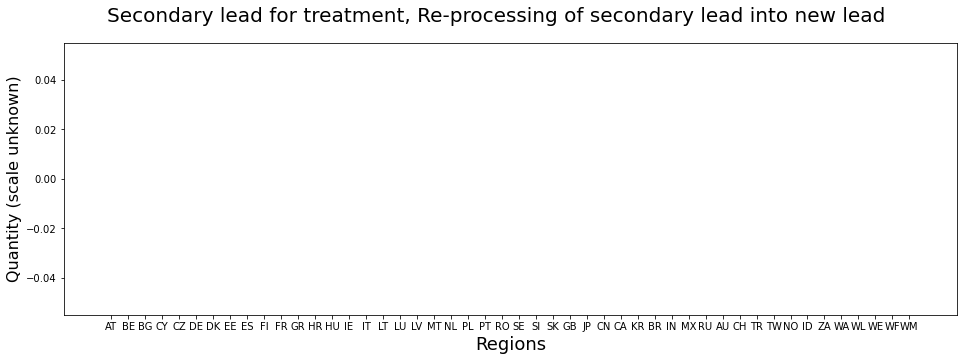

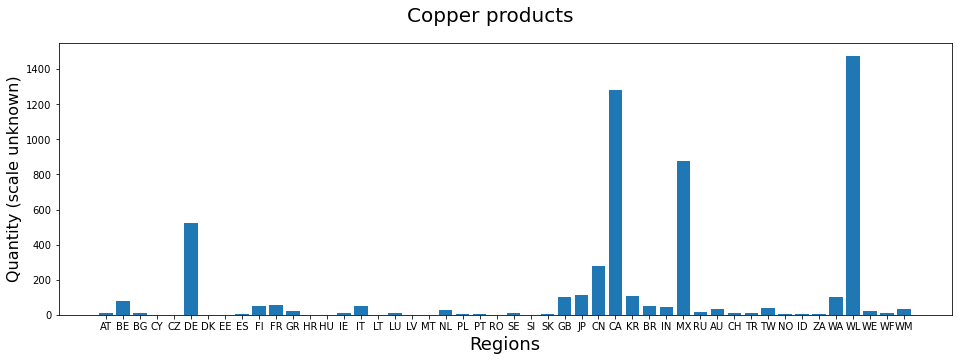

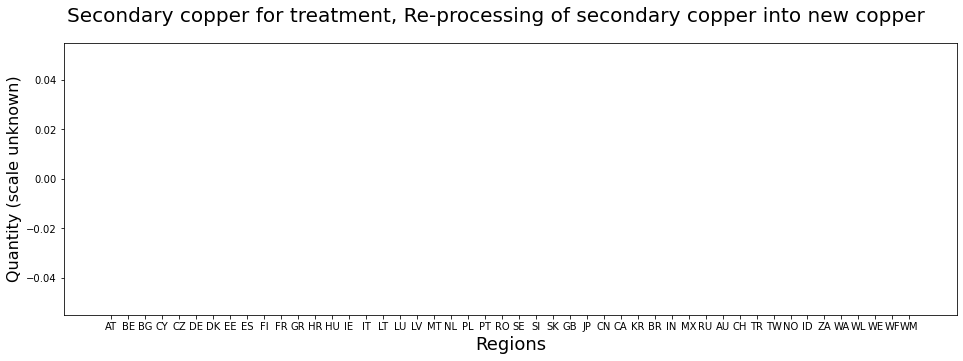

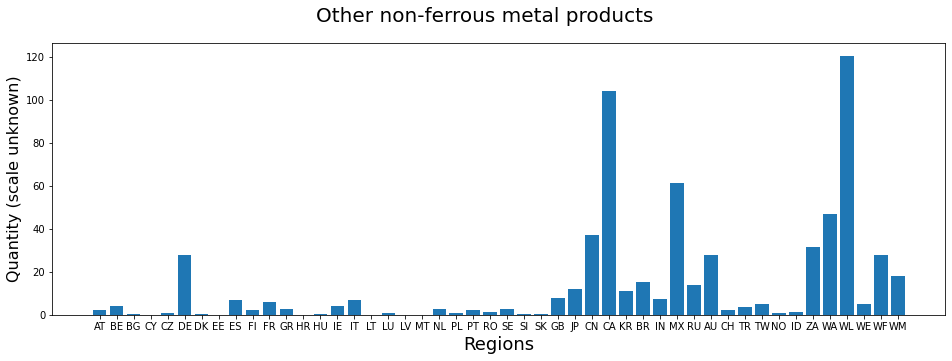

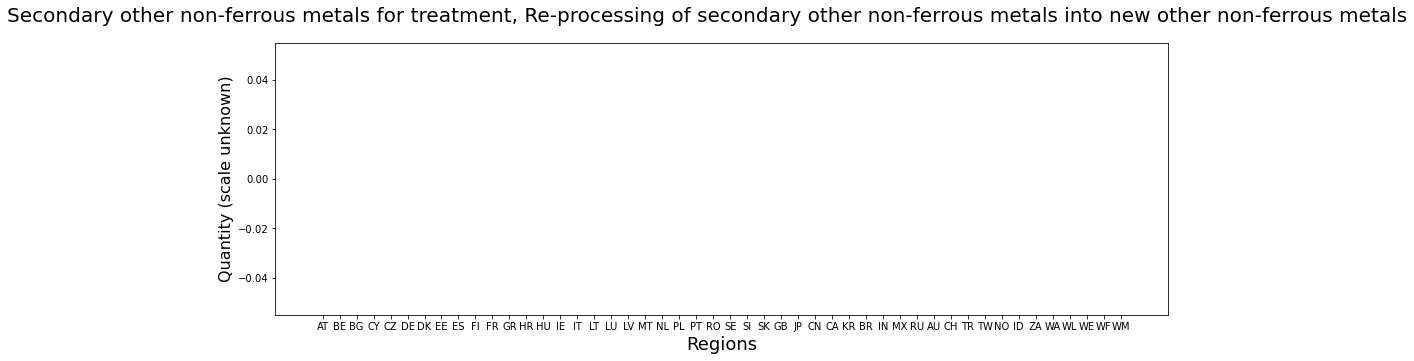

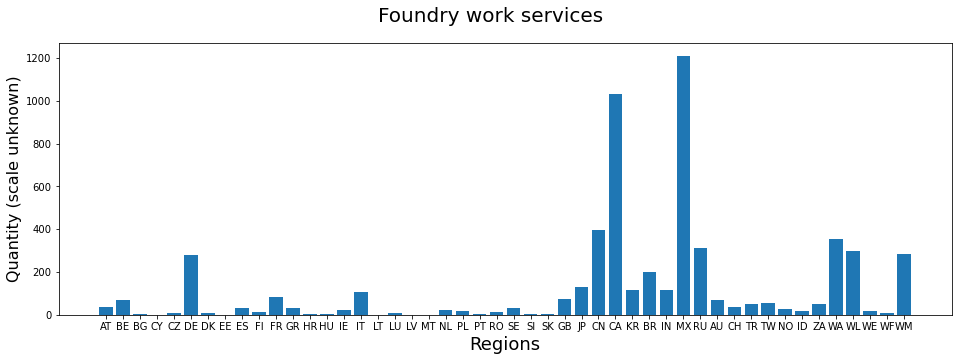

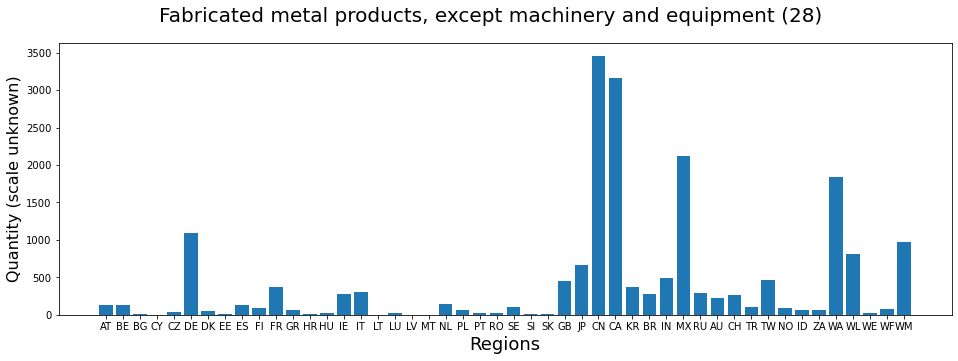

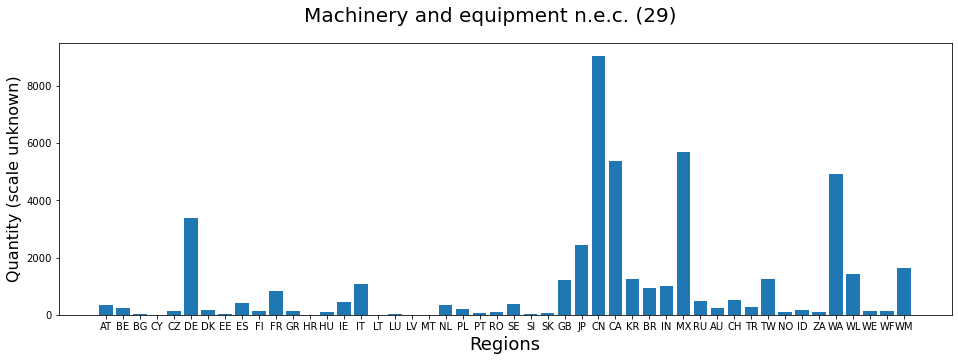

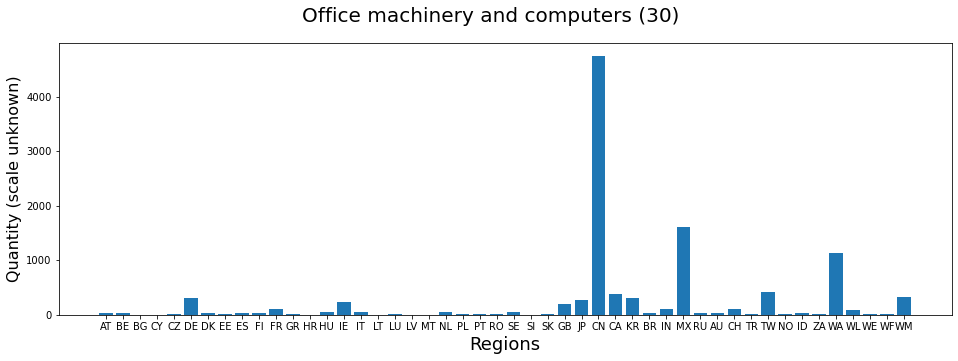

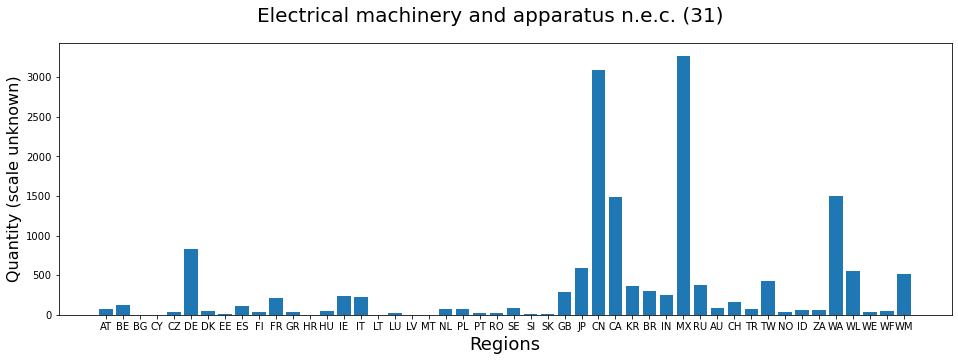

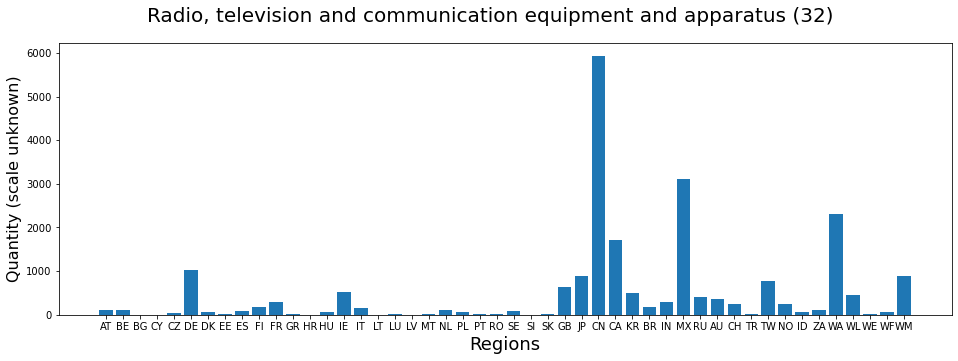

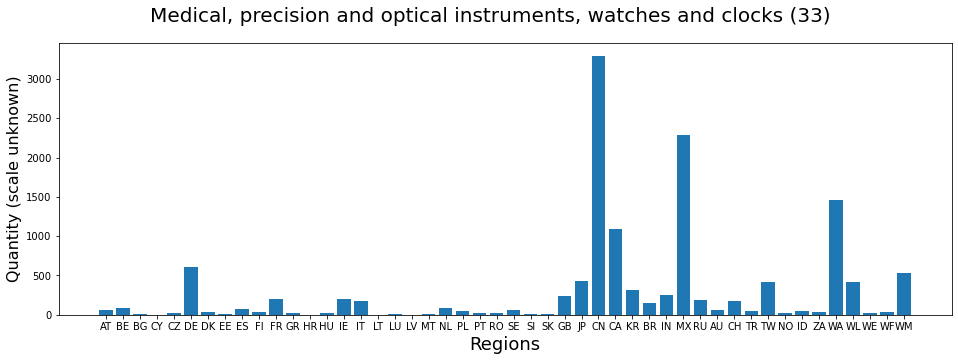

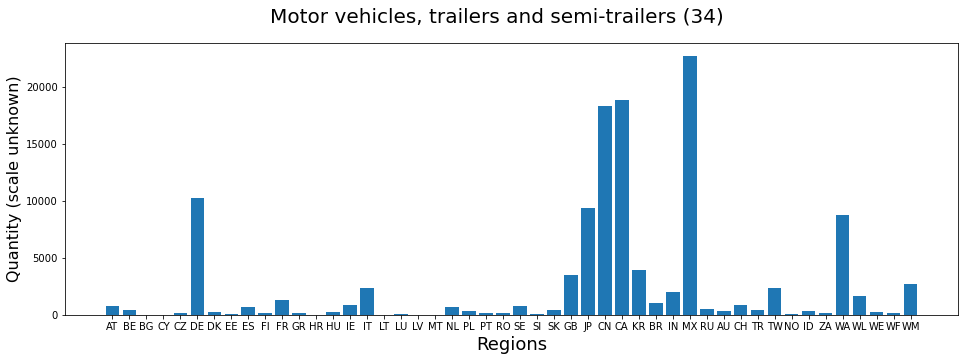

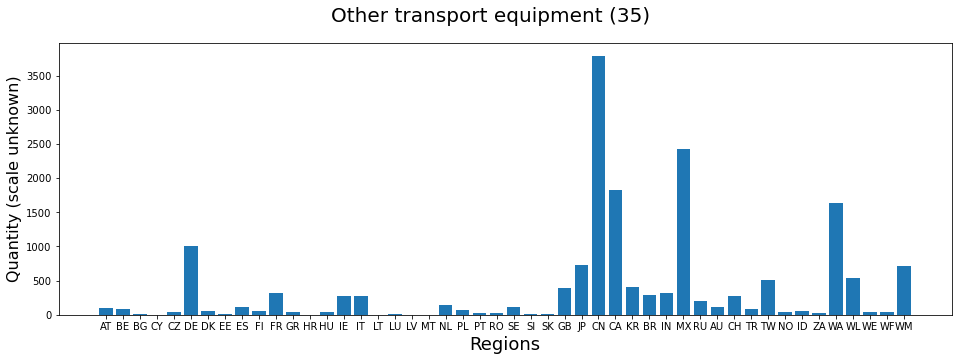

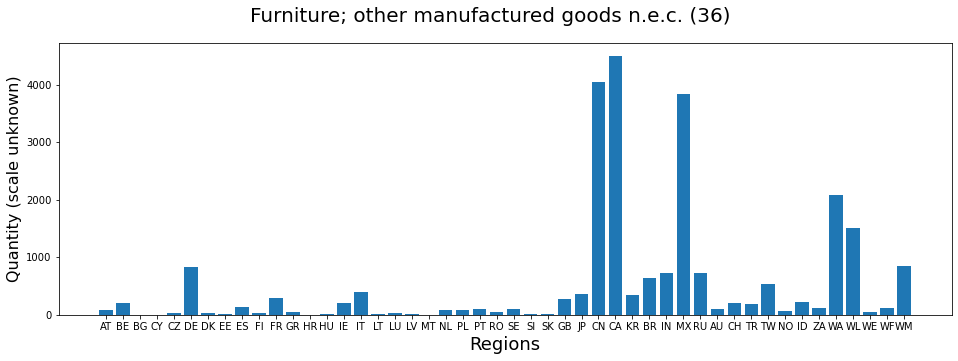

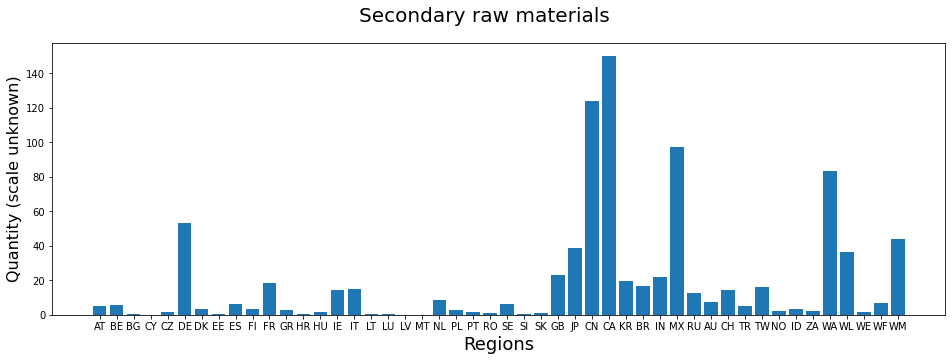

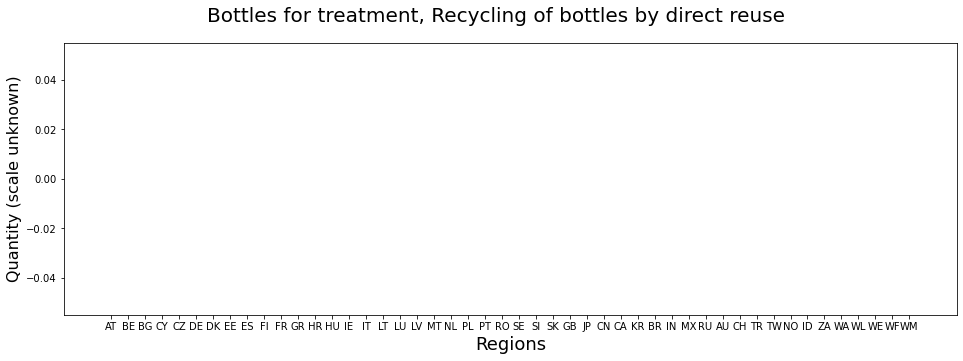

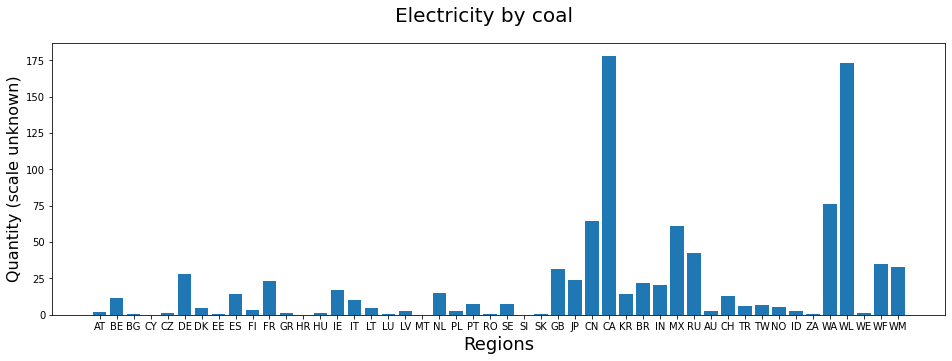

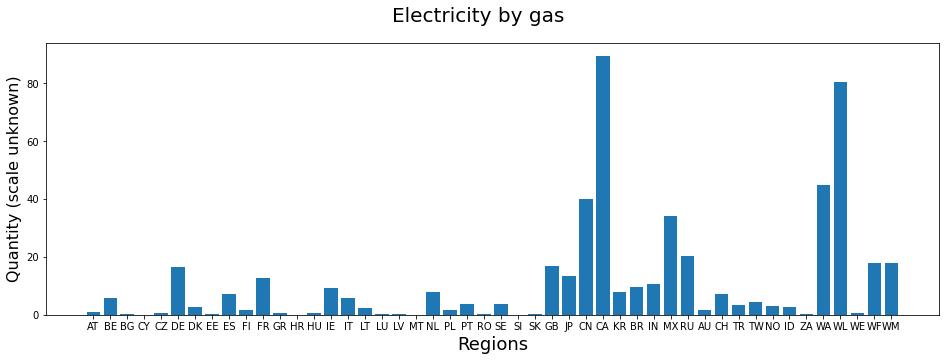

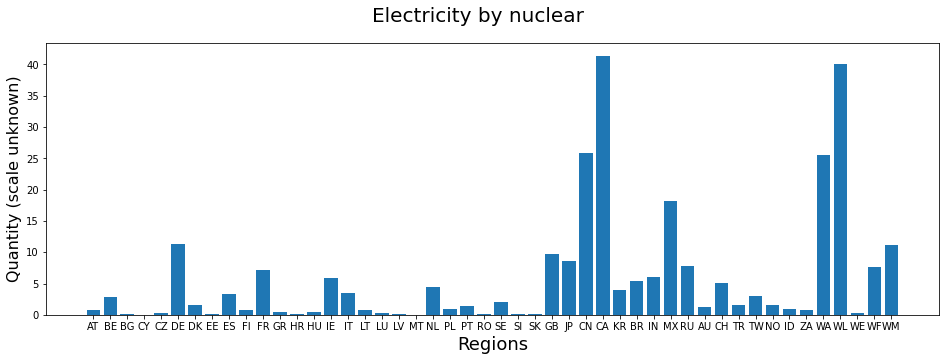

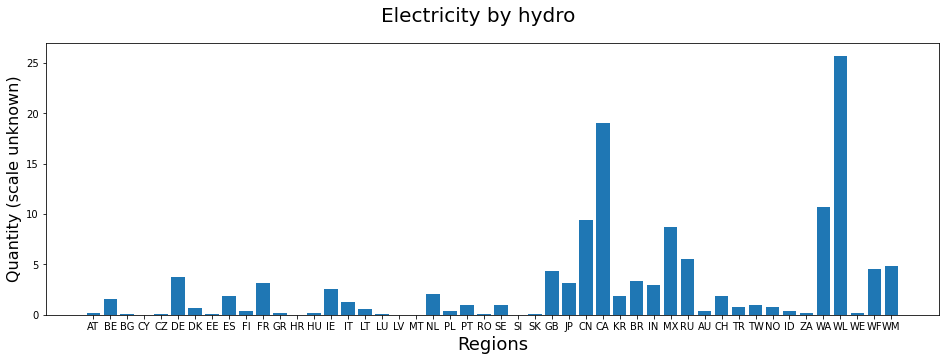

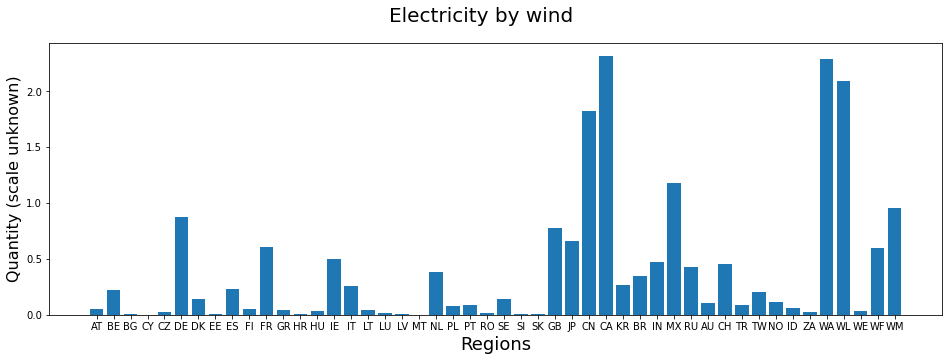

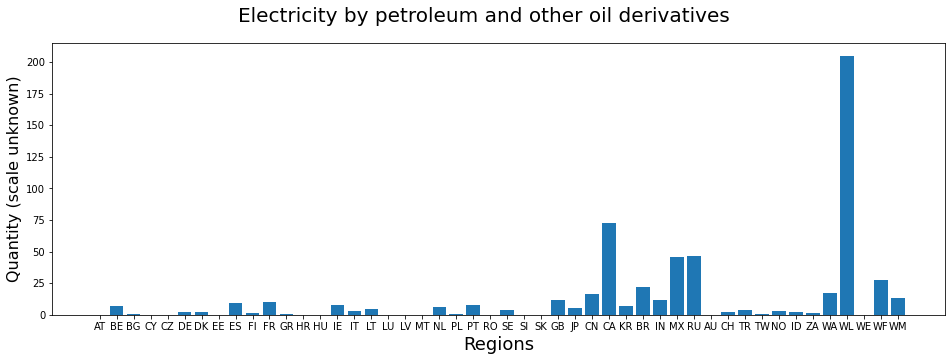

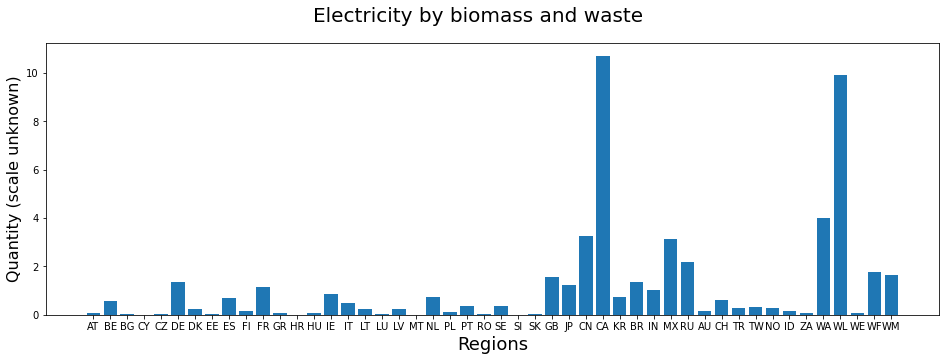

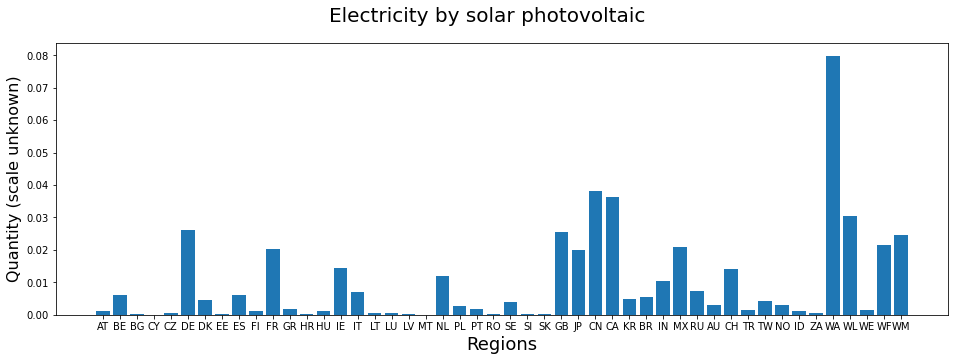

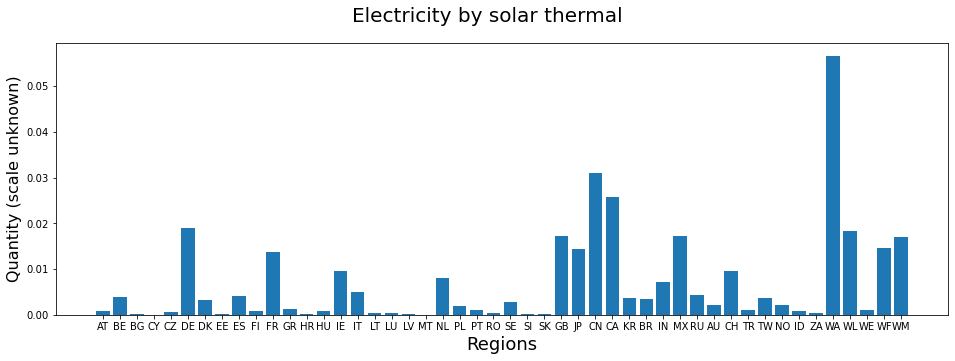

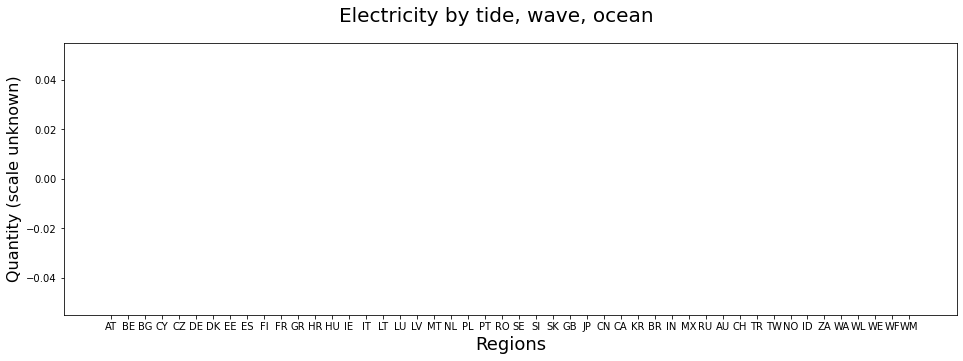

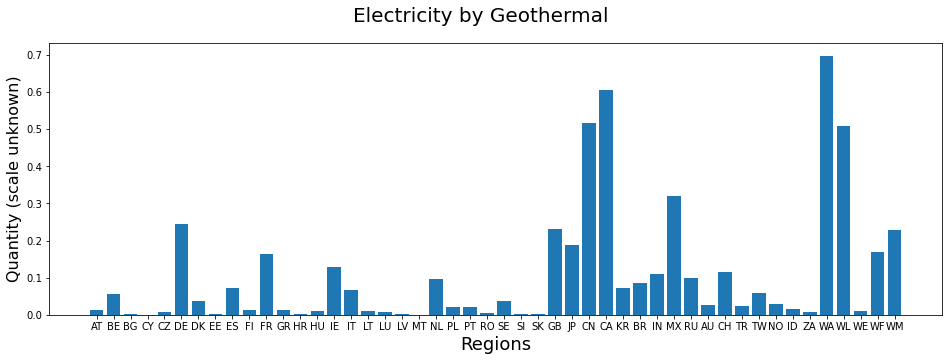

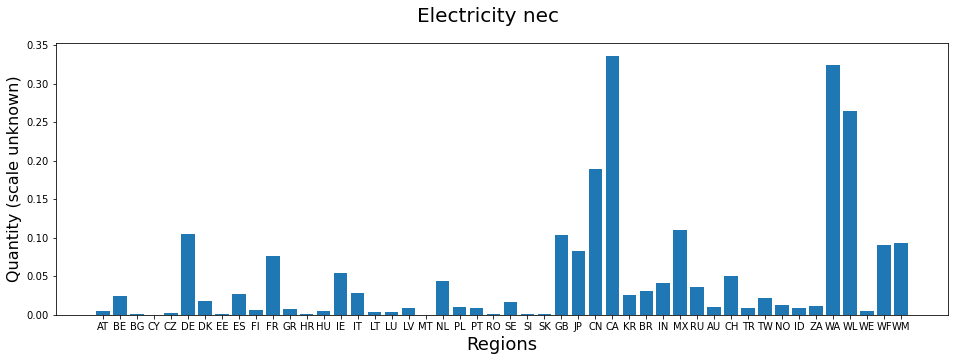

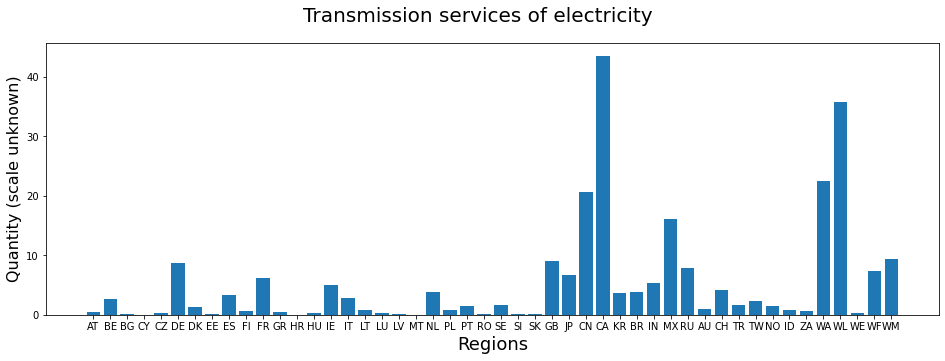

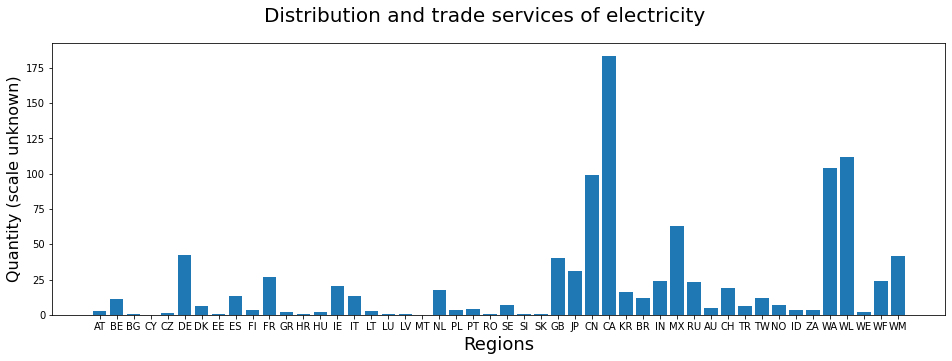

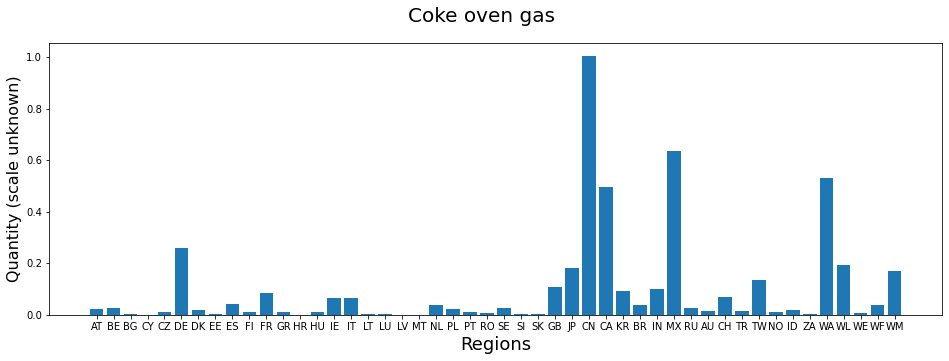

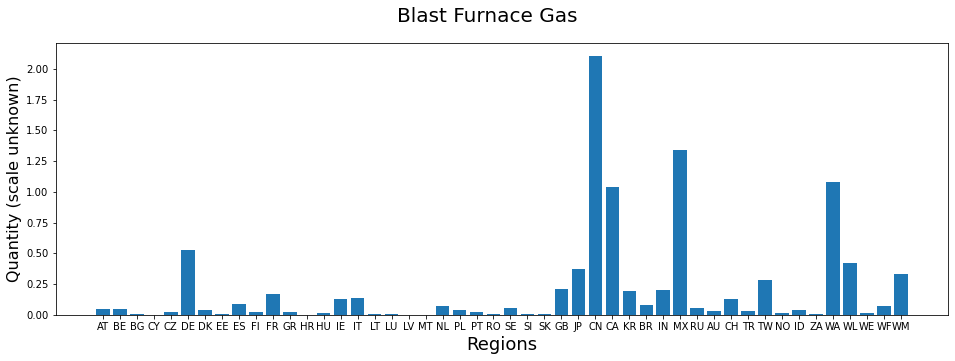

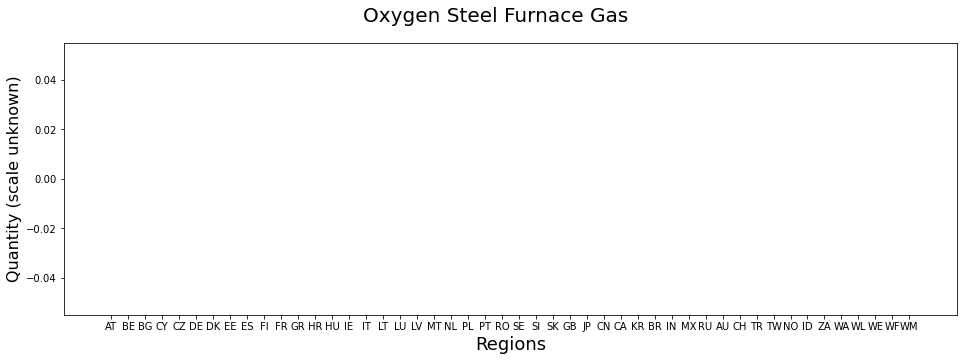

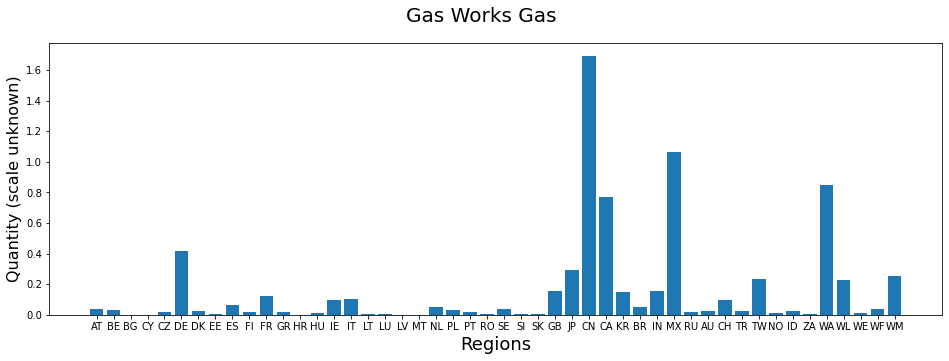

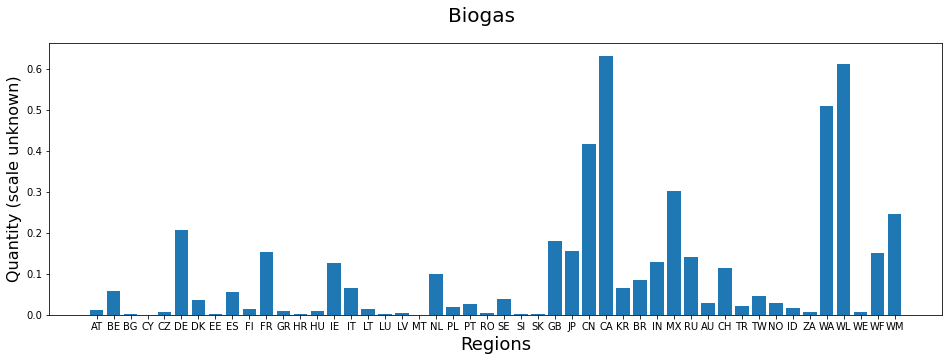

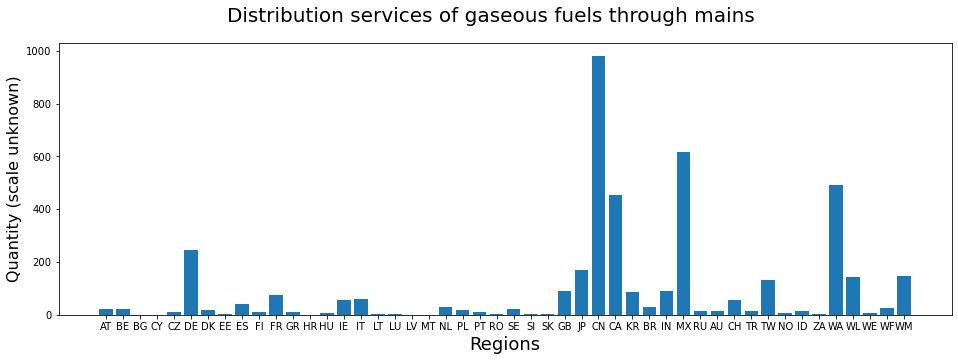

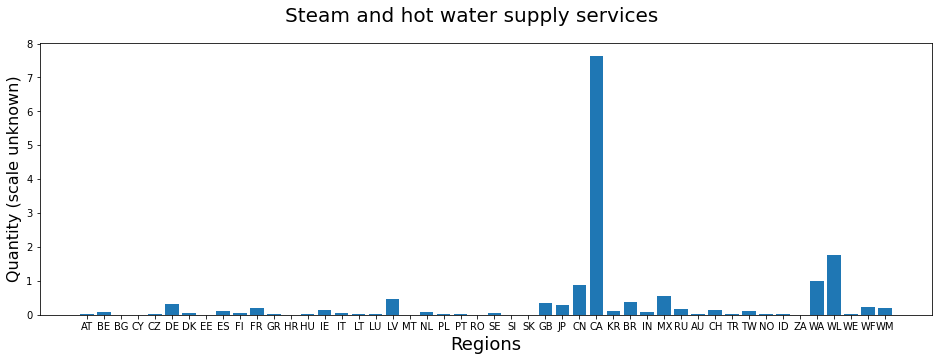

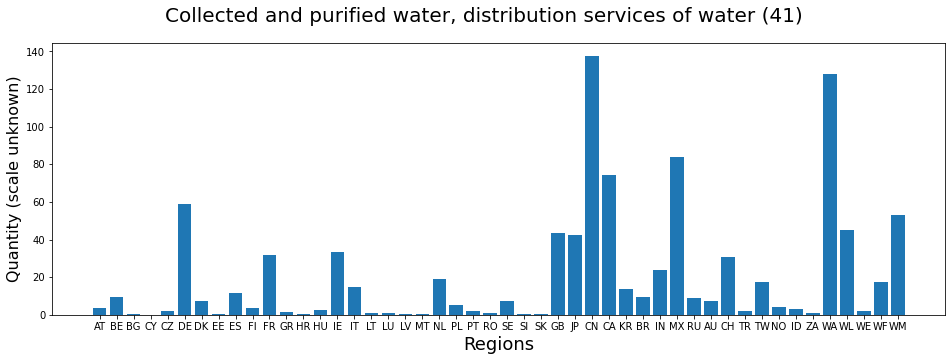

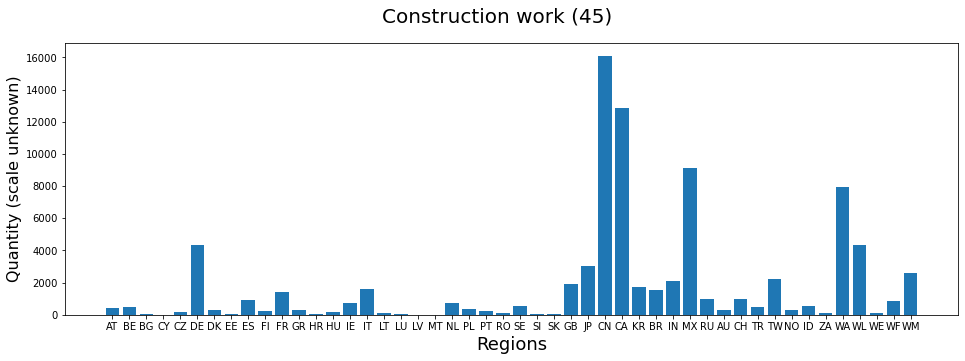

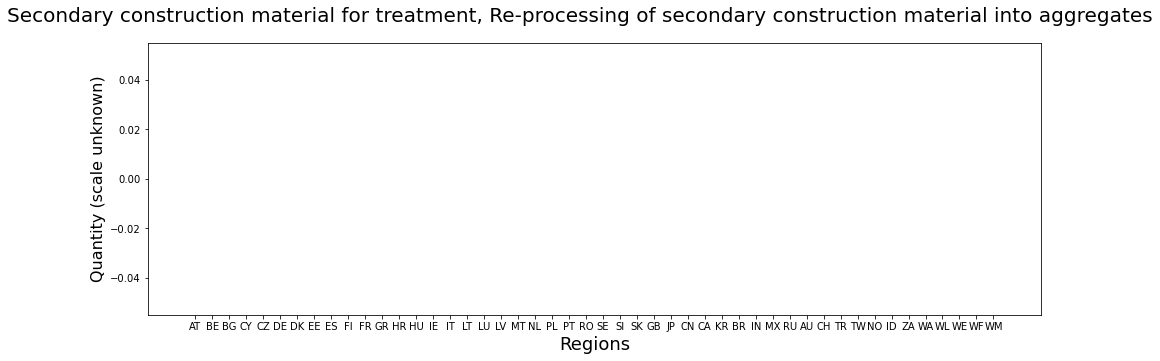

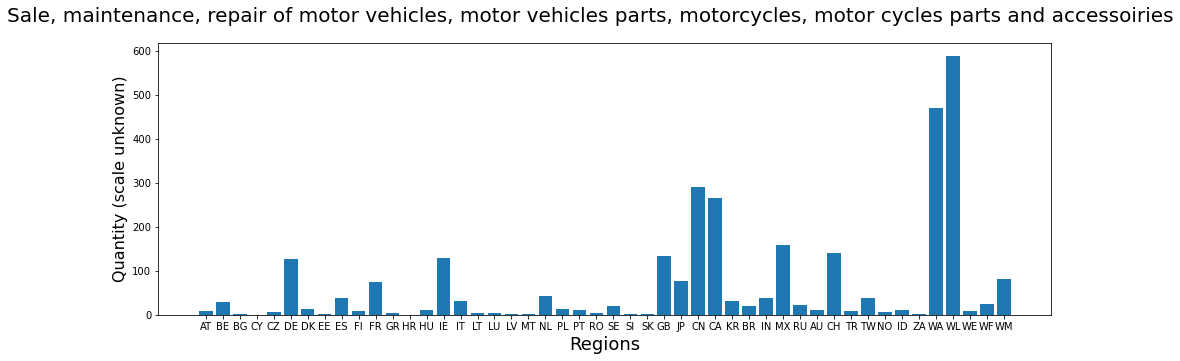

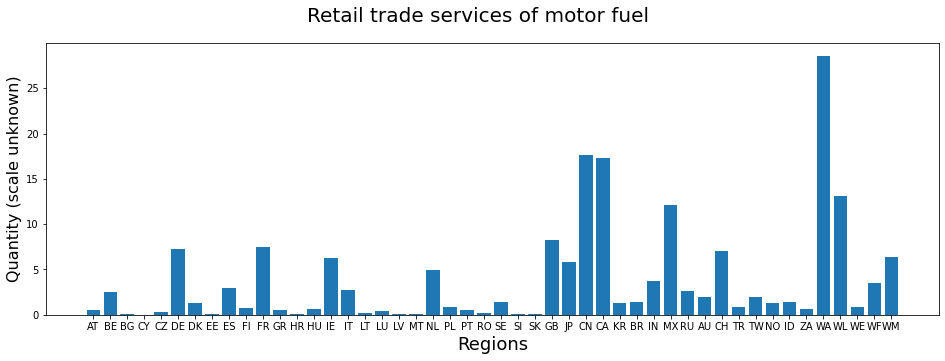

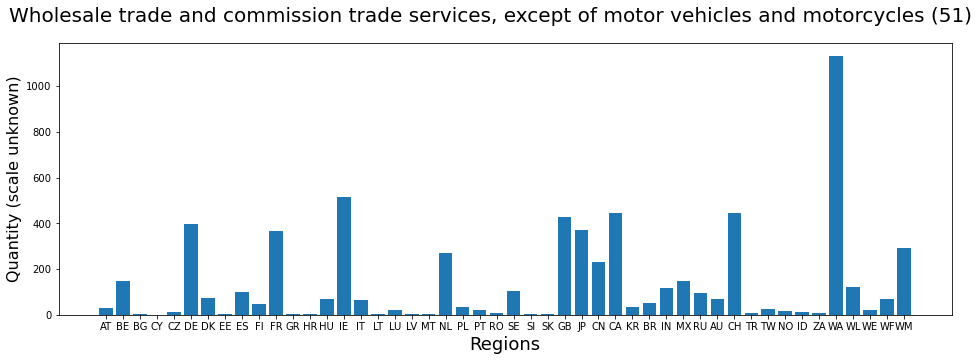

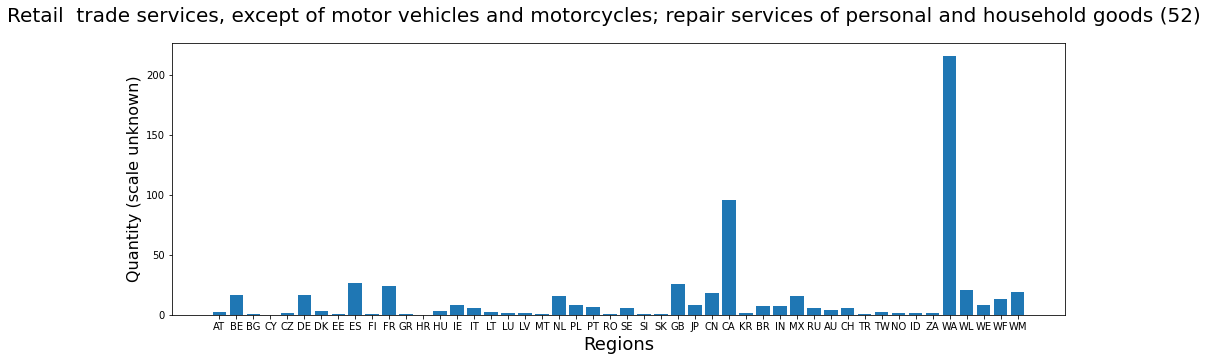

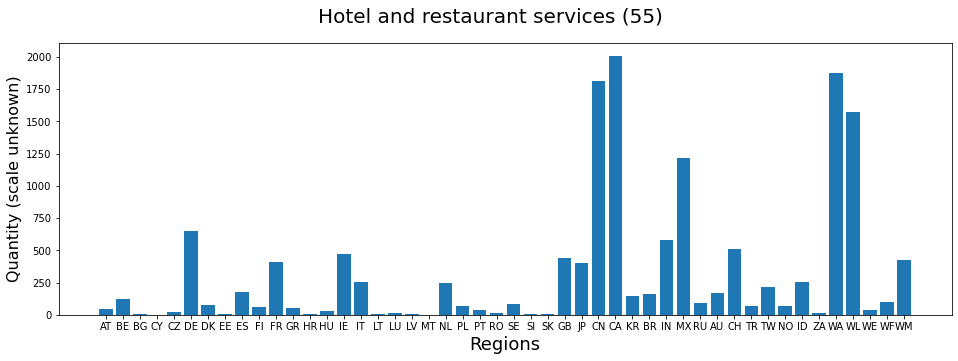

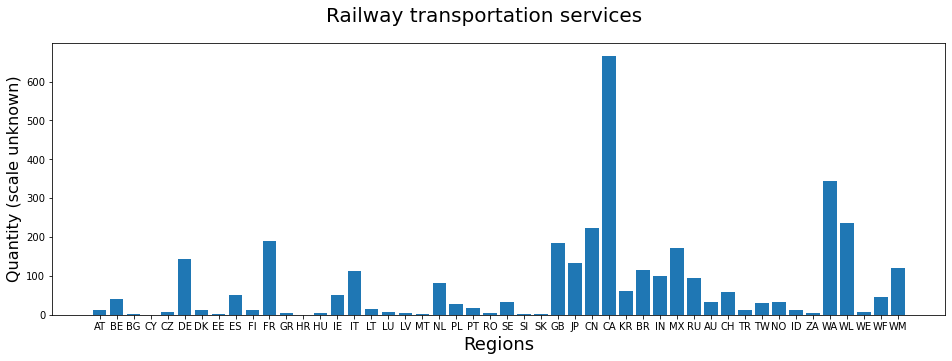

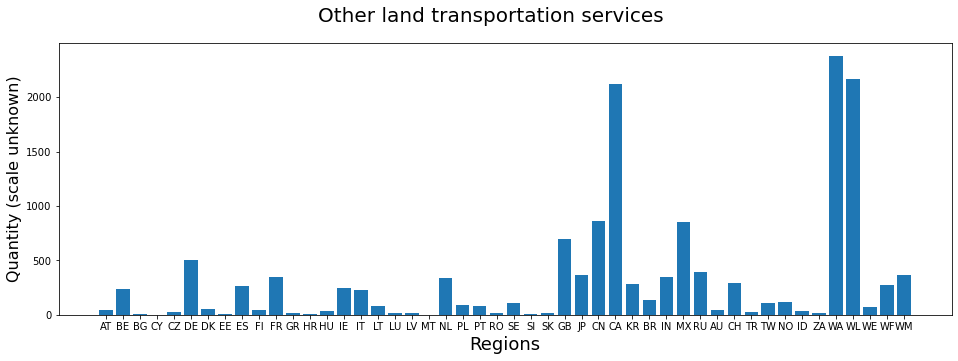

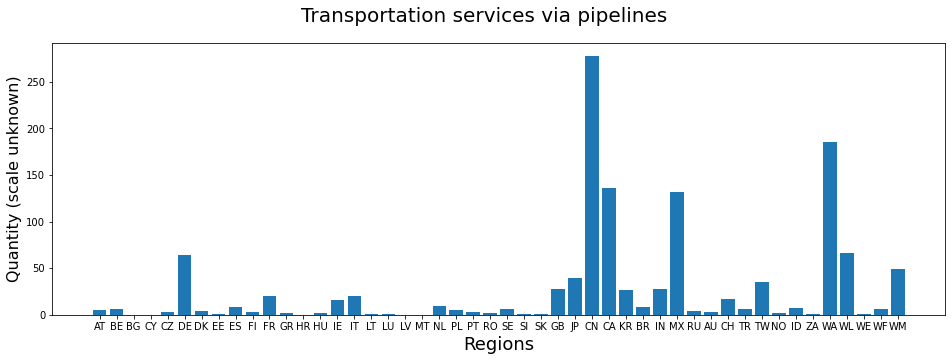

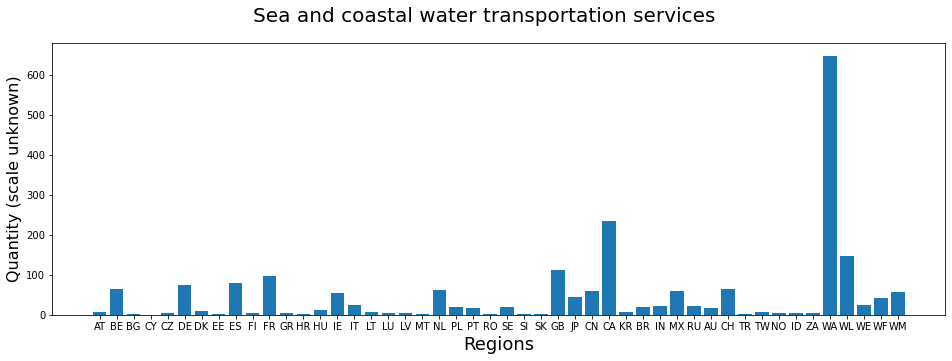

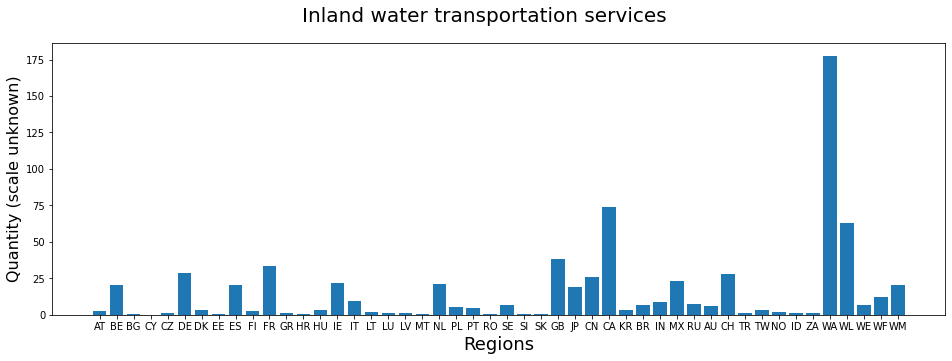

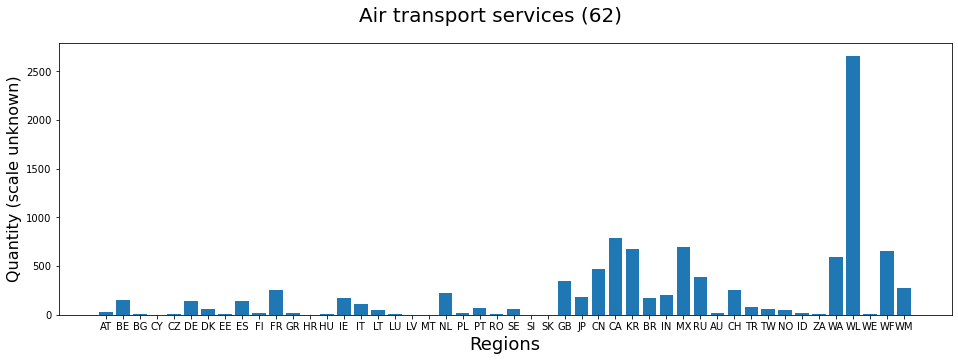

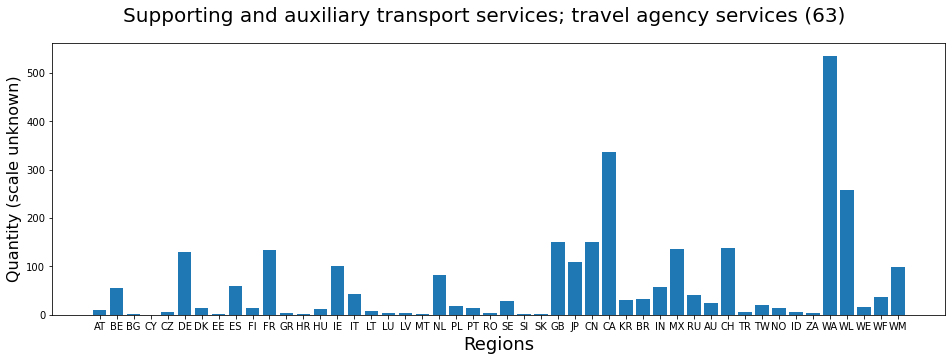

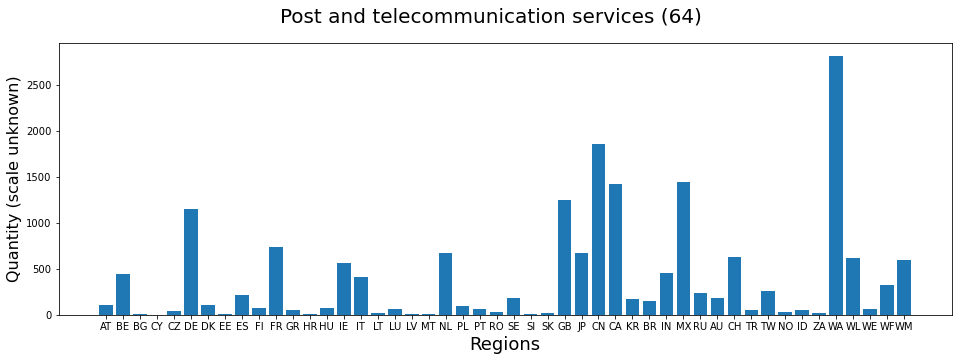

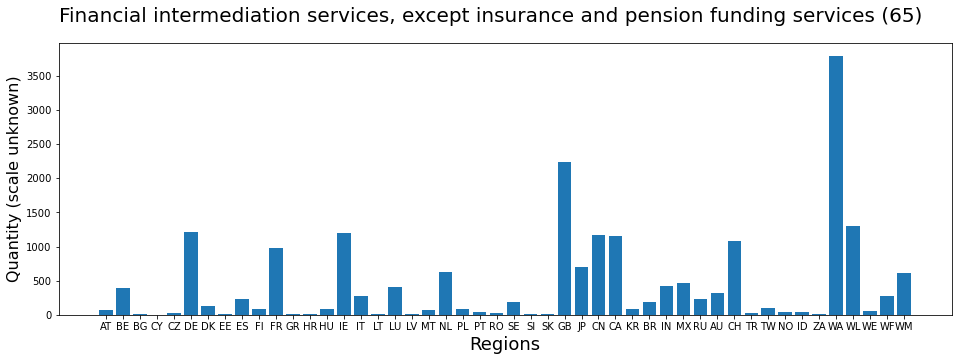

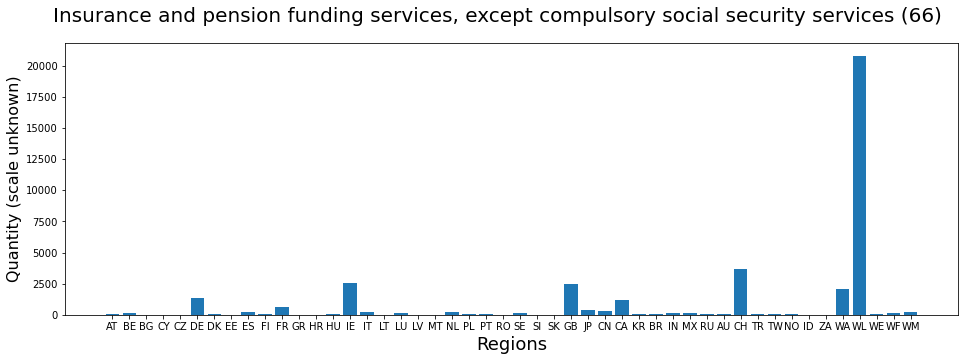

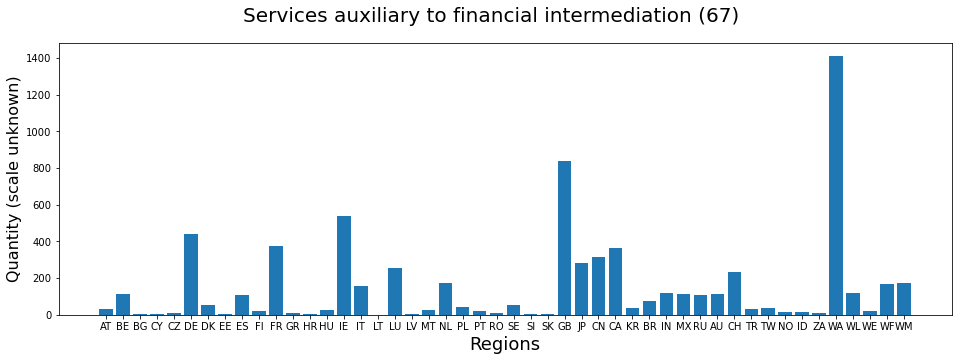

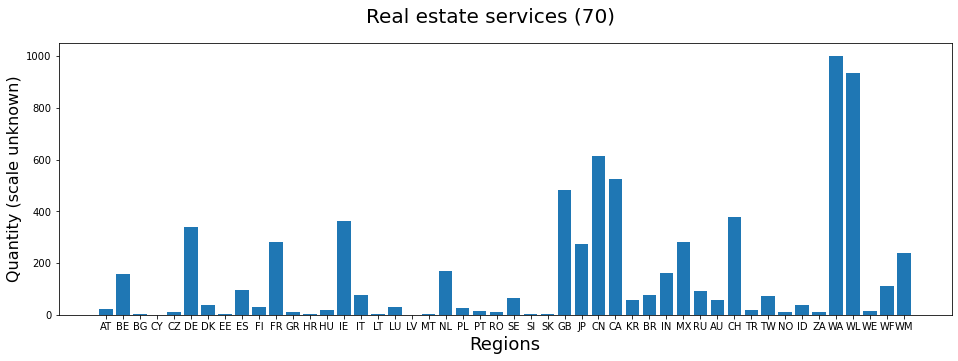

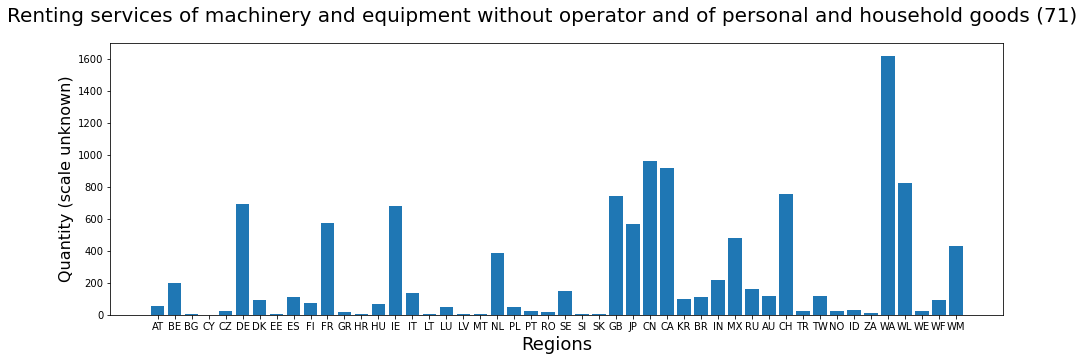

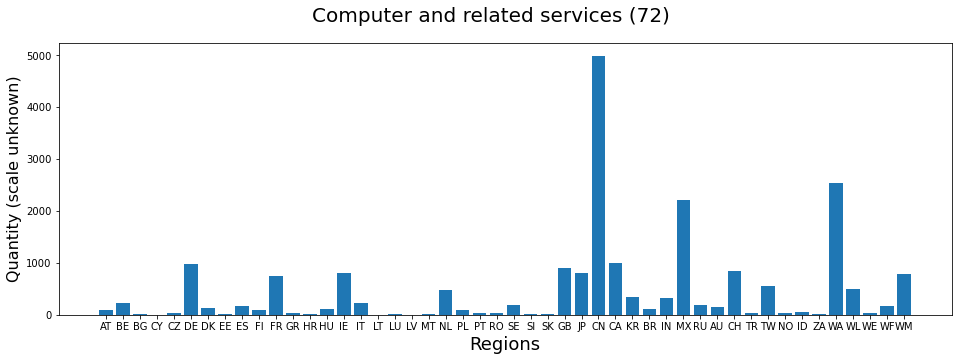

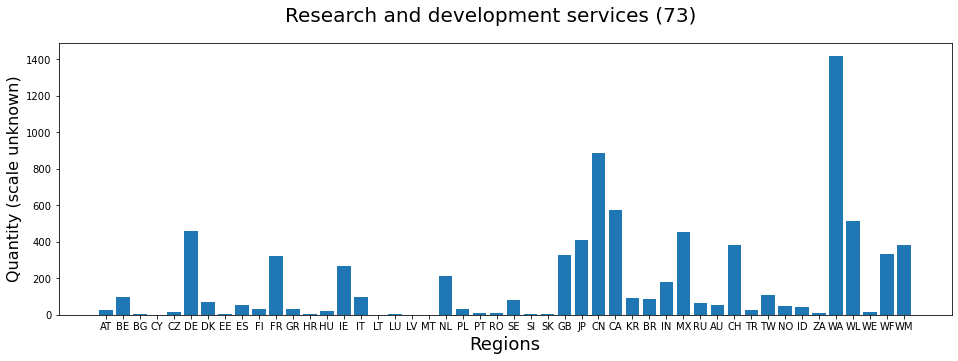

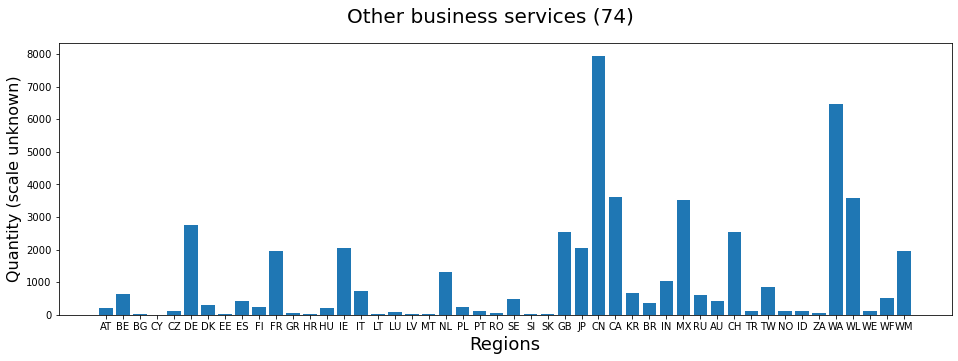

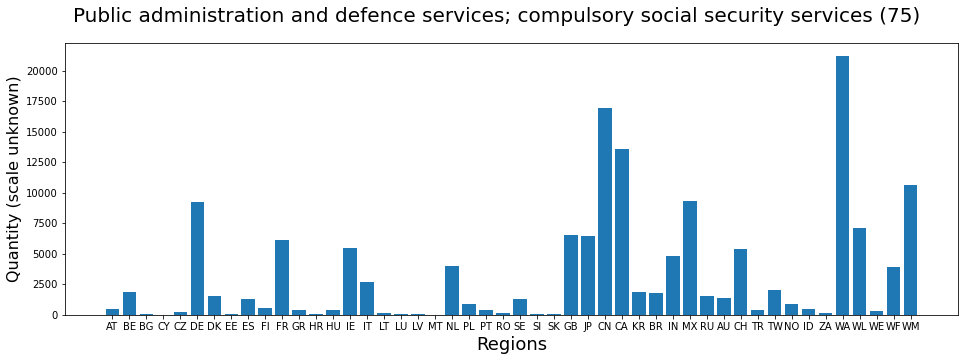

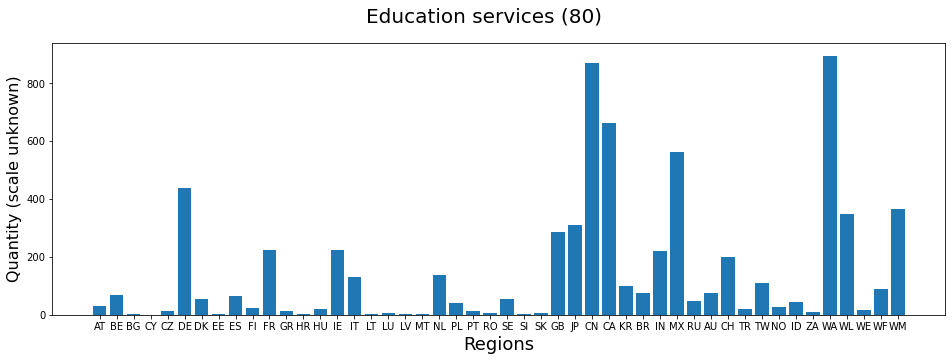

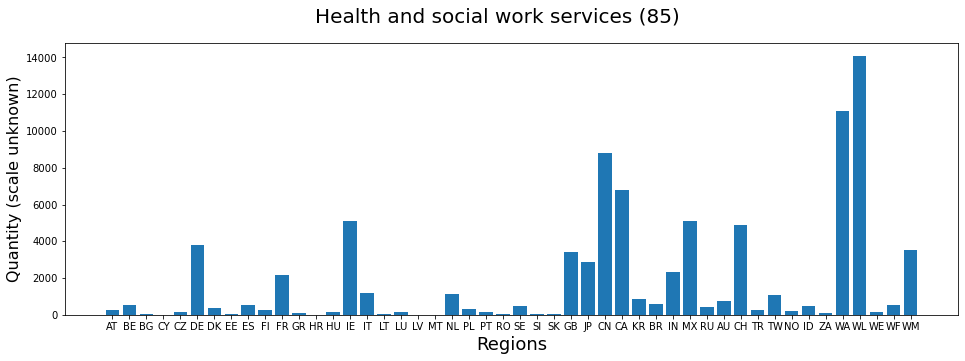

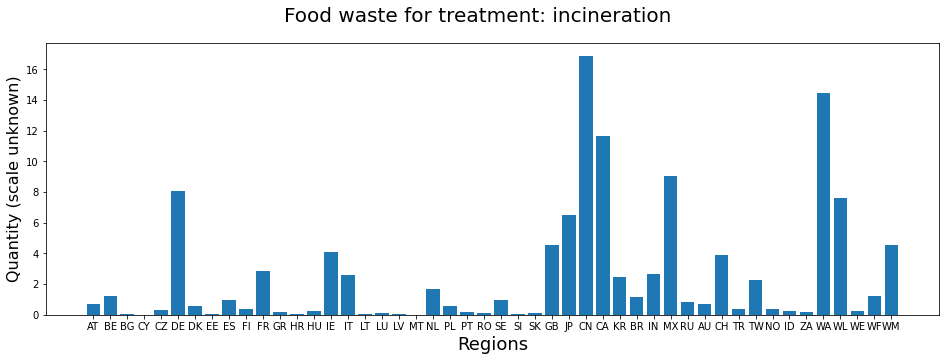

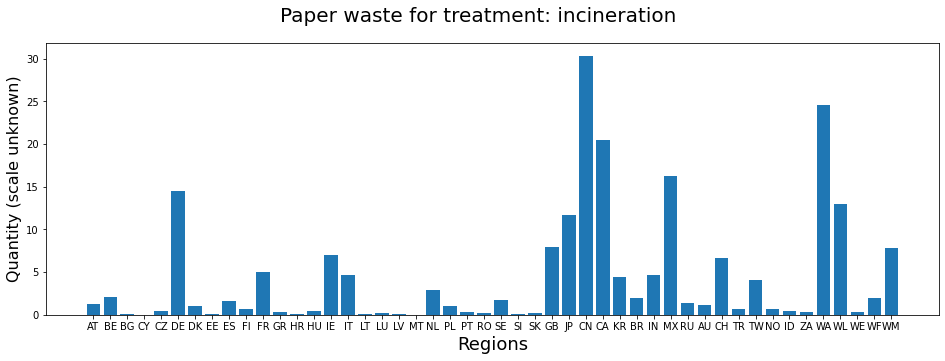

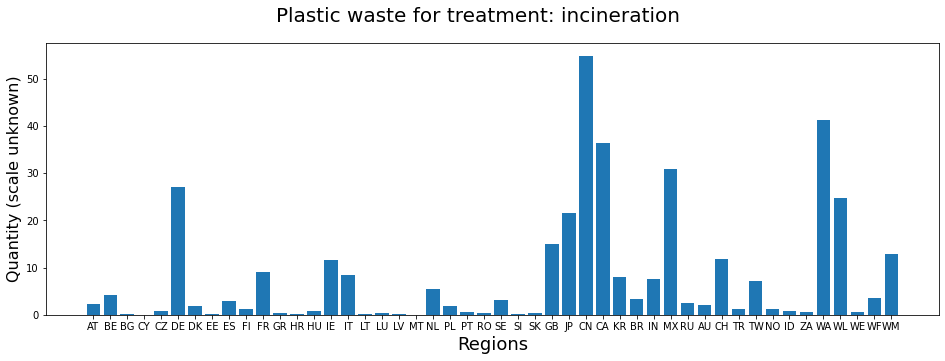

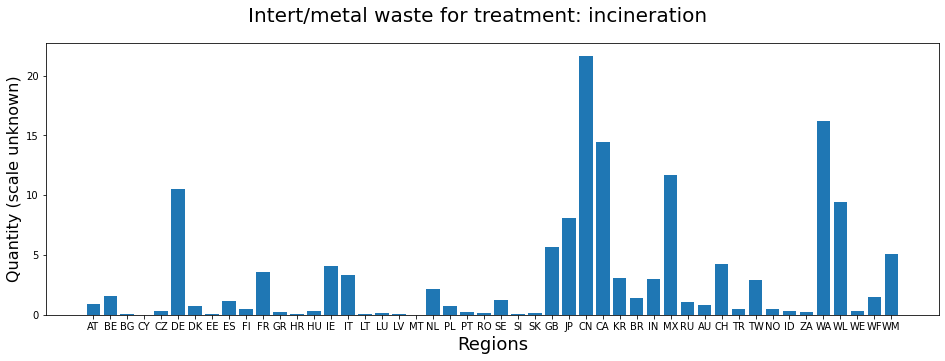

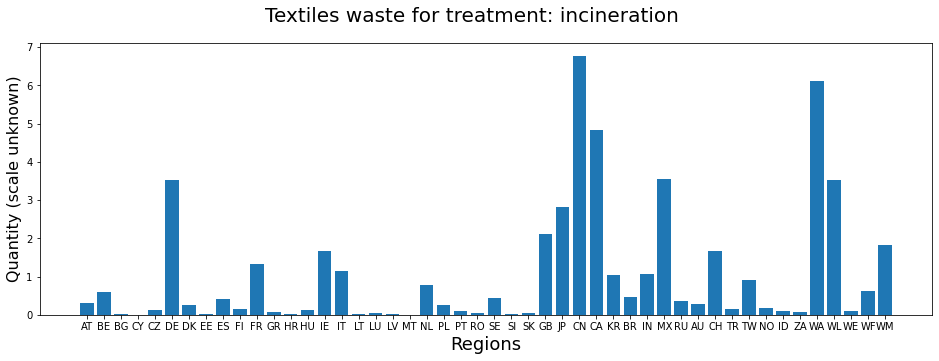

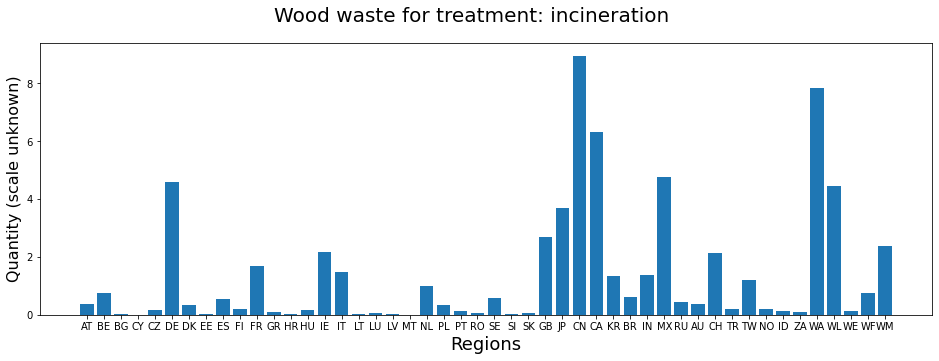

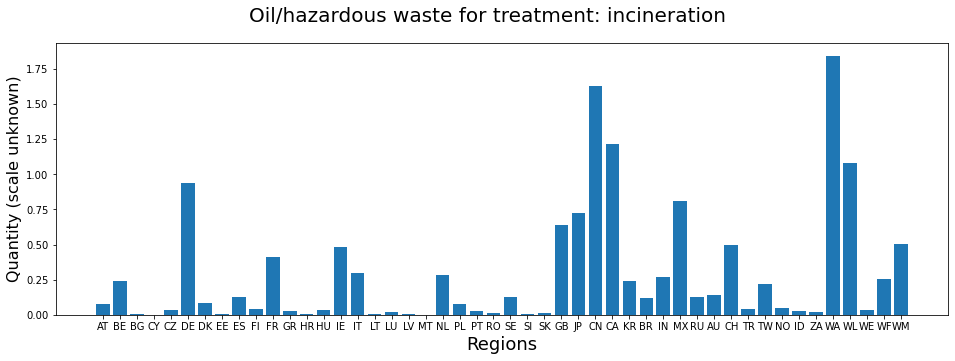

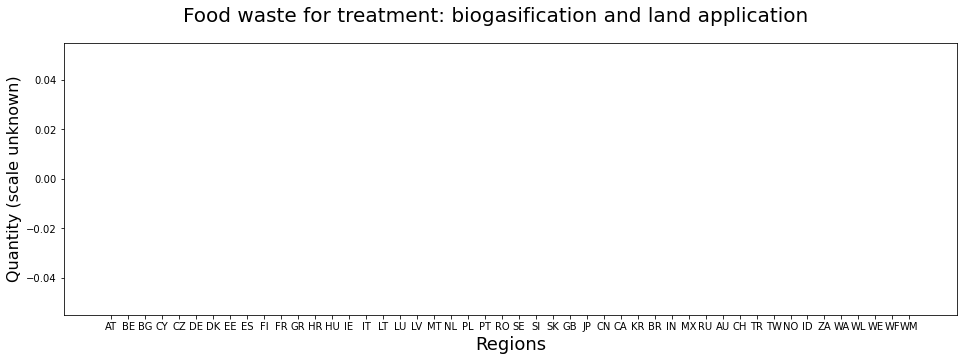

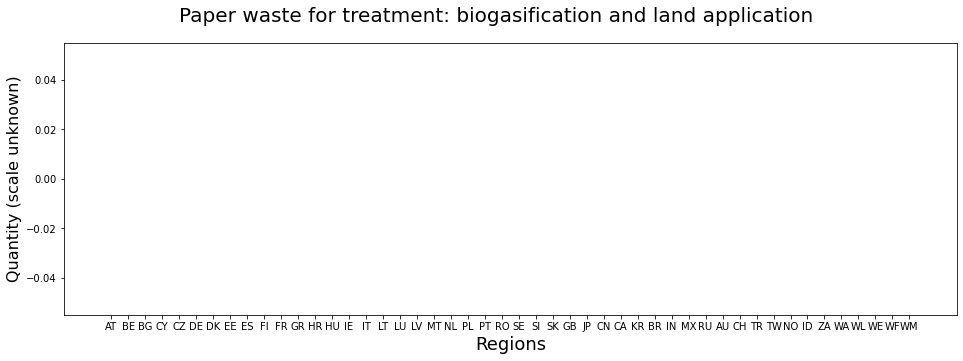

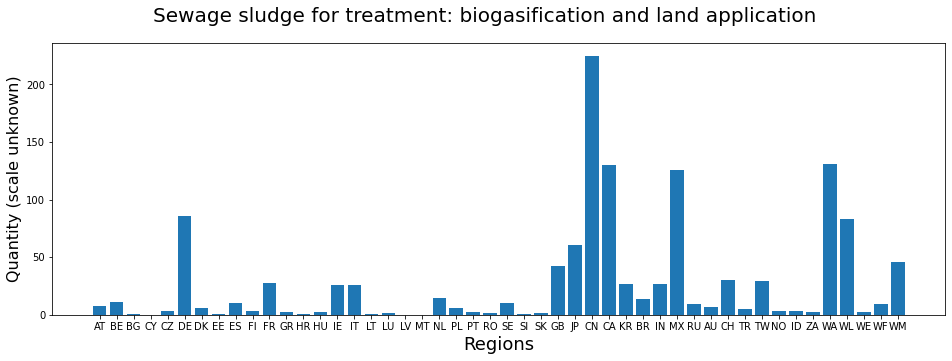

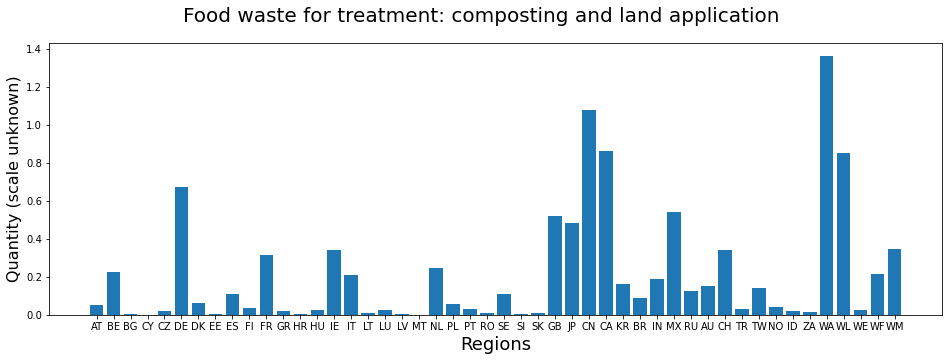

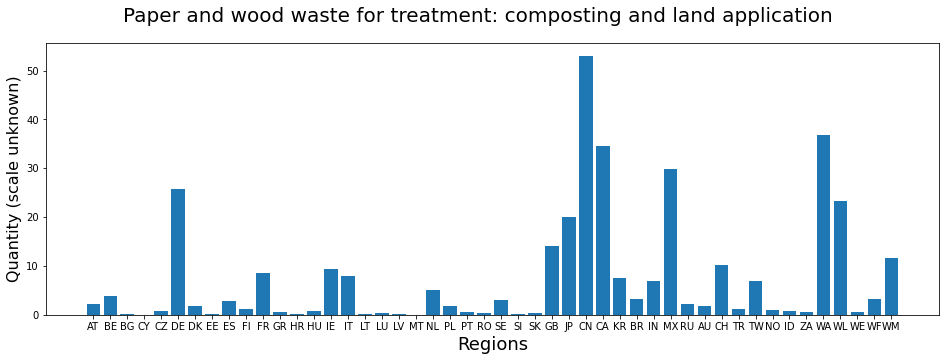

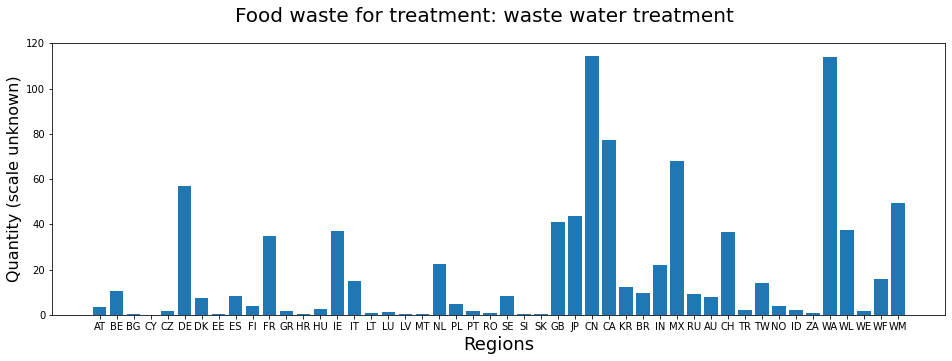

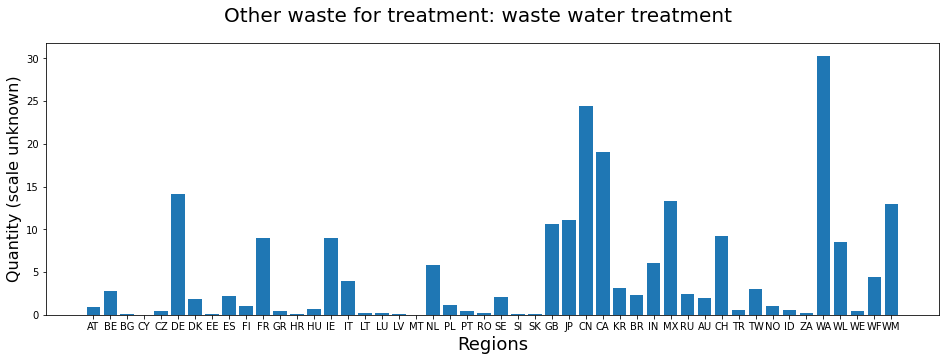

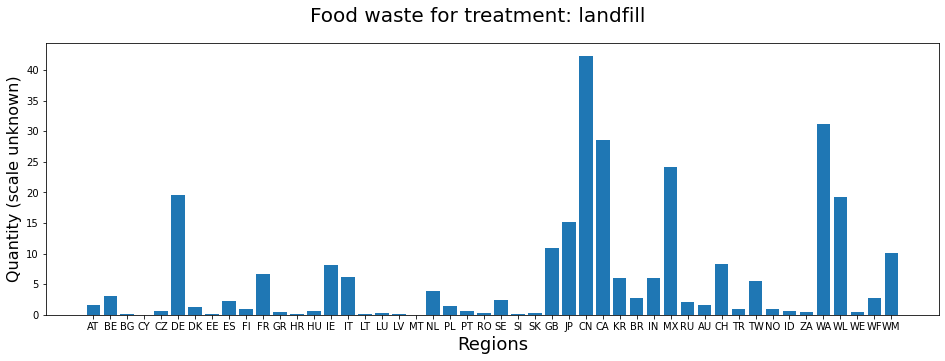

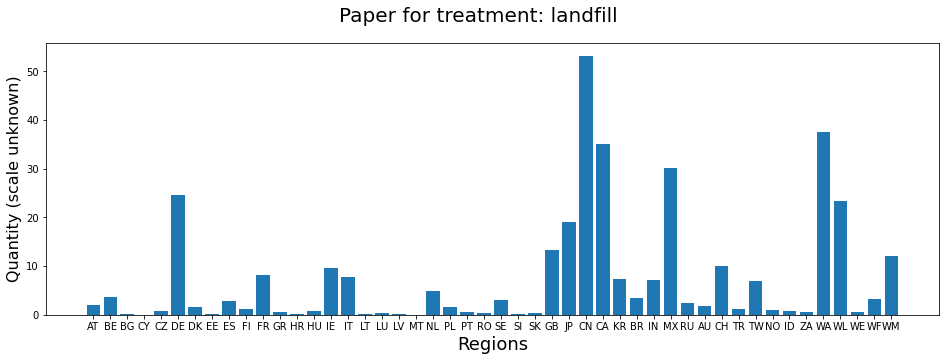

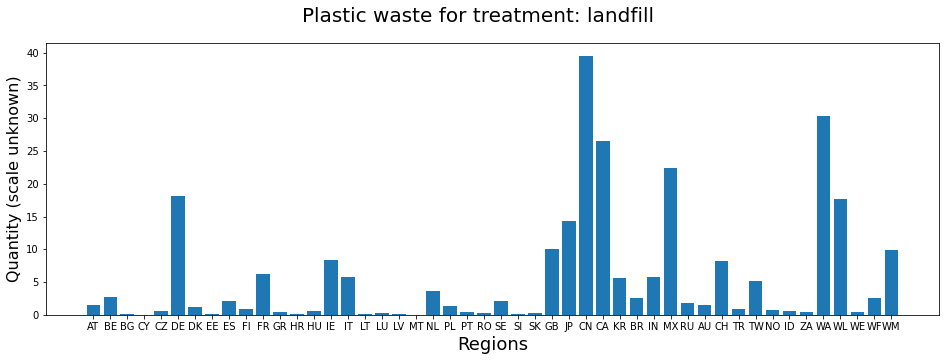

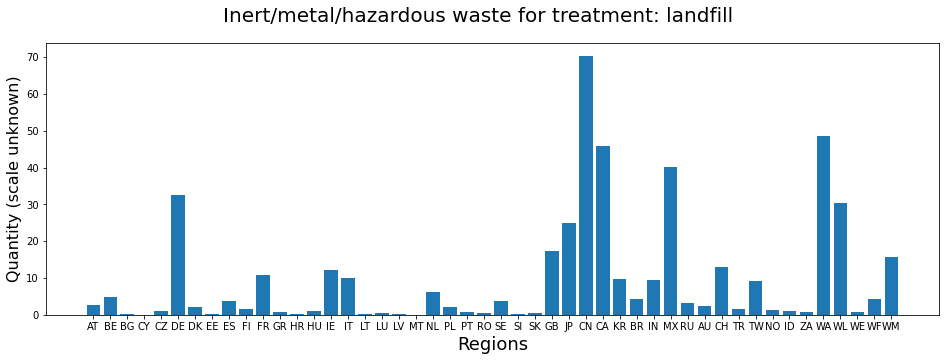

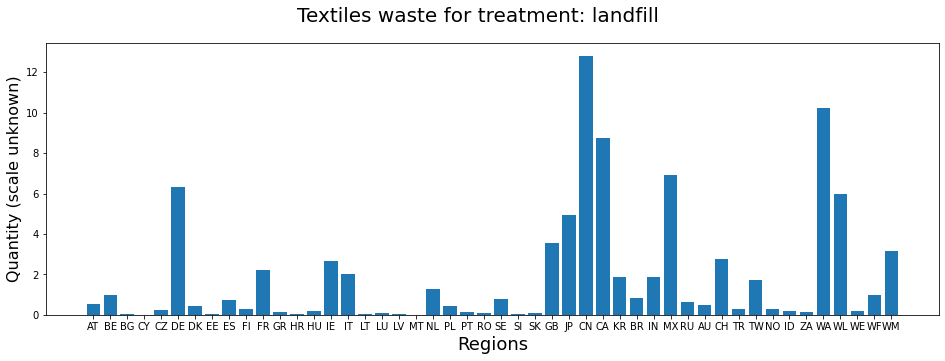

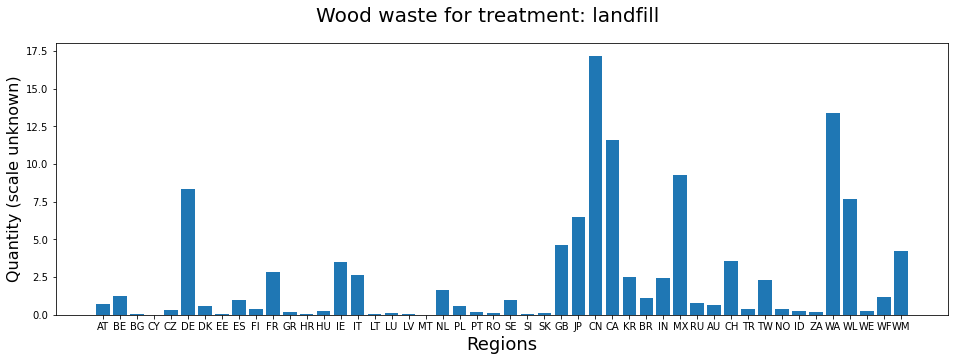

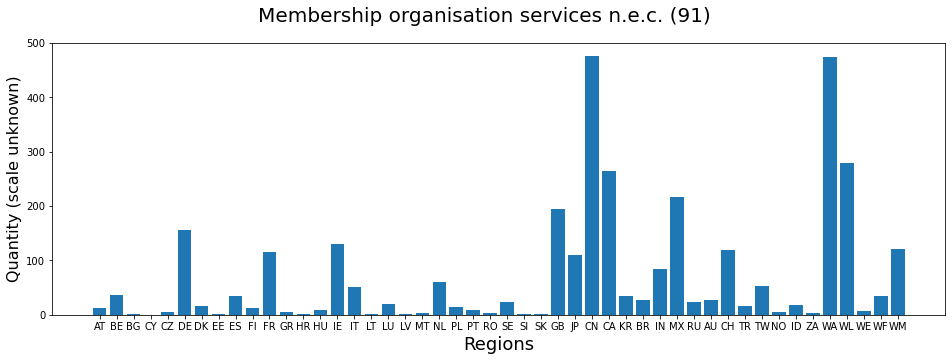

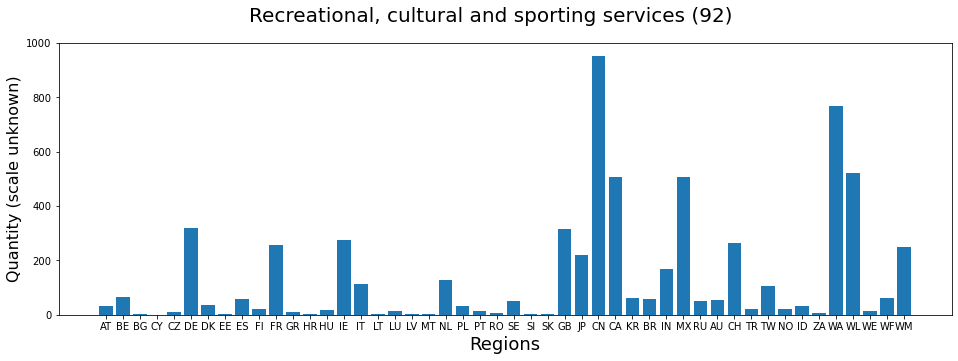

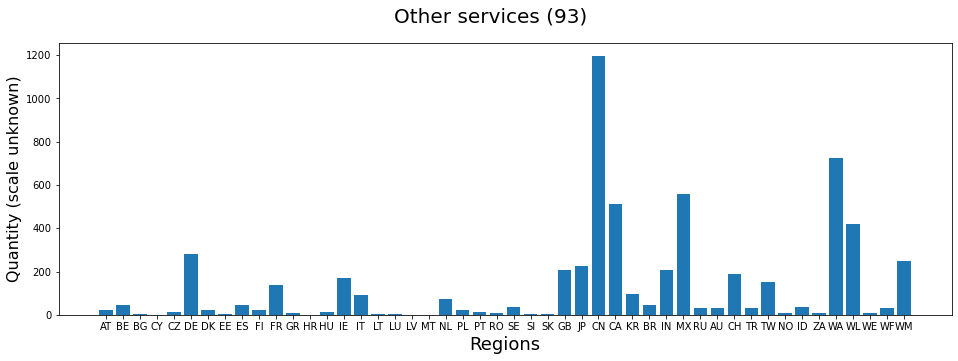

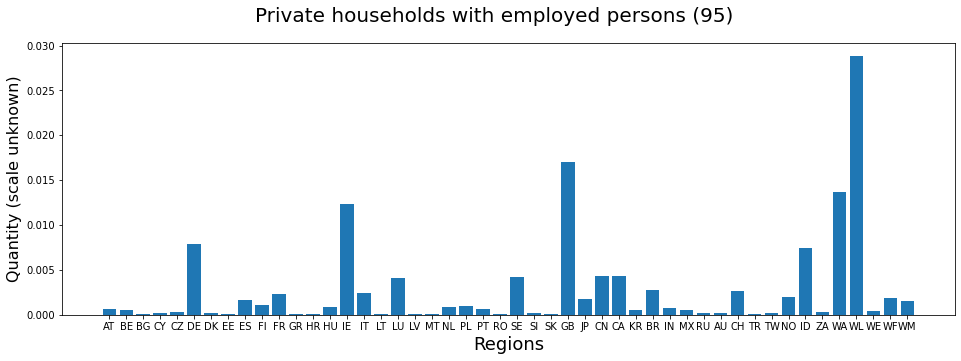

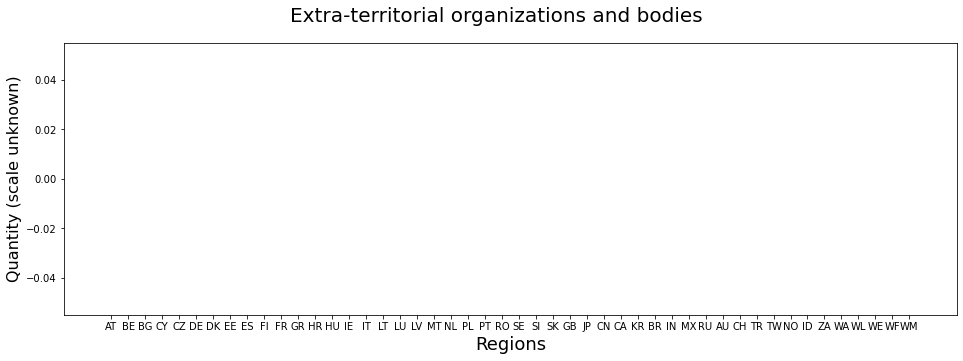

In [187]:
count = 0
for sector in all_sectors:
    x, y = zip(*US_total_trade[sector].items())
    fig = plt.figure(figsize=(16, 5))
    ax = fig.add_subplot(111)
    ax.bar(x,y)
    fig.suptitle(sector, fontsize=20)
    plt.xlabel('Regions', fontsize=18)
    plt.ylabel('Quantity (scale unknown)', fontsize=16)

    
    plt.show()